# **Project Name**    - 



In [3]:
##### **Project Type**    - EDA + Classification (Supervised ML)
##### **Contribution**    - Individual
##### **Team Member Name -** Mainak Ghosh

# **Project Summary -**

**Objective**

The principal aim of this initiative is the development of an advanced machine learning algorithm designed to forecast customer satisfaction (CSAT score) based on historical data from customer support interactions. The overarching goal is to empower Flipkart’s customer service division by elucidating the primary catalysts of both satisfaction and dissatisfaction, thereby facilitating proactive measures to enhance the holistic customer experience.

**Dataset Overview**

The dataset encompasses both structured and unstructured data elements, including:

- Quantitative attributes such as Item_price and connected_handling_time.
- Categorical variables incorporating escalation indicators like Supervisor and Manager.
- Unstructured text feedback from users, manifesting as remarks.
- The target variable, CSAT Score, rated on a scale from 1 (very dissatisfied) to 5 (highly satisfied).

For the purpose of streamlining the classification task, the CSAT Score was transformed into a dichotomous format:

- A score of 5 denotes high satisfaction (mapped to class 1)
- Scores from 1 to 4 signify lower satisfaction (mapped to class 0)

**Data Preprocessing and Feature Engineering**

The data underwent rigorous preprocessing, which entailed expunging rows with absent target values and substituting nulls within feature columns via mean imputation (using SimpleImputer). To augment model learning, novel features were synthesized:

- has_remarks: Denotes whether the customer provided a remark.
- remark_length: Quantifies the word count of the remark.
- is_escalated: A binary attribute indicating if the ticket was escalated to both Supervisor and Manager.

Such measures ensured that both non-numeric and unstructured data contributed substantively to the model’s efficacy.

**Handling Class Imbalance**

Given the dataset's profound class imbalance, wherein the majority of customers were not highly satisfied, the Synthetic Minority Oversampling Technique (SMOTE) was applied on the training set to equilibrate the classes. This intervention mitigated potential bias toward the predominant class within the model.

**Model Development**

A trio of machine learning models was employed and scrutinized:

- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier

Each model was trained using an 80/20 stratified train-test partition and fine-tuned via GridSearchCV with 5-fold cross-validation. Specifically, for Random Forest, hyperparameters such as n_estimators, max_depth, min_samples_split, and min_samples_leaf were optimized.

**Evaluation Metrics**

The models were evaluated using the following metrics:

- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix

Among the models assessed, Random Forest and XGBoost exhibited comparatively superior recall and F1-scores concerning the positive class (high satisfaction), though overall accuracy fluctuated between 47–52 percent. This performance underscores the challenging nature of the classification task, stemming from data imbalance and the paucity of robust predictive features.

**Deployment**

The most efficacious model (Random Forest with optimized hyperparameters) was serialized and preserved using joblib, facilitating seamless redeployment in a production setting. Accompanying code provisions for loading the model and applying it to unseen customer support data were also incorporated.

**Business Impact**

The model offers actionable insights to Flipkart by:

- Pinpointing prospective dissatisfied customers.
- Enhancing response strategies to service.
- Refining escalation protocols.
- Optimizing agent training and support procedures.

By identifying dissatisfaction promptly, Flipkart can bolster customer retention and elevate the overall customer experience.

This project lays down a rudimentary framework for automating CSAT prediction. While the current model’s accuracy is modest due to dataset constraints, notable improvements can be realized through the integration of more robust NLP techniques, additional behavioral attributes, and enhanced data collection. The model functions as a pragmatic resource in advancing customer-centric refinements within support services.

# **GitHub Link -**

Provide your GitHub Link here.



# **Problem Statement**


In the fiercely competitive e-commerce sector, customer satisfaction stands as a vital metric that significantly impacts business growth and success. As a prominent e-commerce platform, Flipkart processes an extensive volume of customer support tickets each day. These tickets encompass both structured data (such as item price, handling time, escalation status) and unstructured data (encompassing customers' free-text comments and remarks).

Presently, there exists no automated system capable of efficiently analyzing this data to predict customer satisfaction outcomes. The manual review of feedback is not only labor-intensive but also inconsistent and lacks scalability. Without deriving actionable insights from previous support interactions, the organization faces challenges in identifying patterns of dissatisfaction or areas that necessitate improvement in its customer service operations.

The absence of predictive capability similarly hinders timely interventions that could help retain potentially dissatisfied customers or enhance the quality of support. Therefore, there is an imperative business necessity to harness historical support data to develop an intelligent system that can accurately forecast customer satisfaction levels.

**Objective:**
To design and develop a machine learning-based predictive model that classifies customer satisfaction (CSAT) as either "High" or "Low," utilizing historical customer support data. This model should leverage both structured and unstructured features to uncover critical determinants of satisfaction, thereby aiding in the enhancement of customer support strategies.

This solution will enable Flipkart to:

* Proactively identify customer experiences at risk,
* Optimize support processes and workflows,
* Enhance service quality,
* Ultimately, increase customer retention and loyalty.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns # type: ignore
import missingno as msno # type: ignore

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import  precision_score, recall_score, f1_score


from imblearn.over_sampling import SMOTE


from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE




from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu

import re
import contractions

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
# Download required resources
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

# Download required resources
nltk.download('averaged_perceptron_tagger')


import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM




sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(10,6)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\maina\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\maina\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


### Dataset Loading

In [34]:
df = pd.read_csv("C:/Users/maina/OneDrive/Desktop/Labmentix/Flipakrt_Customer_Support_Analysis/dataset/Customer_support_data.csv")   #Change the path according to the device and where the dataset is located


### Dataset First View

In [4]:
df.head() #it will show the first 5 rows of the dataset

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [15]:
print("Number Of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number Of Rows: 85907
Number of Columns: 20


### Dataset Information

In [16]:
print("\nData types and non-null counts:")
df.info()


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    fl

#### Duplicate Values

In [ ]:
duplicate_count = df.duplicated().sum() #Checks for duplicates and returns the count 
print("Number of duplicate rows: ", duplicate_count)

Number of duplicate rows:  0


#### Missing Values/Null Values

In [ ]:
missing_values = df.isnull().sum() #calculate and stores the no. of missing values in each column
print("Missing/Null values in each column: \n")
print(missing_values)

Missing/Null values in each column: 

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


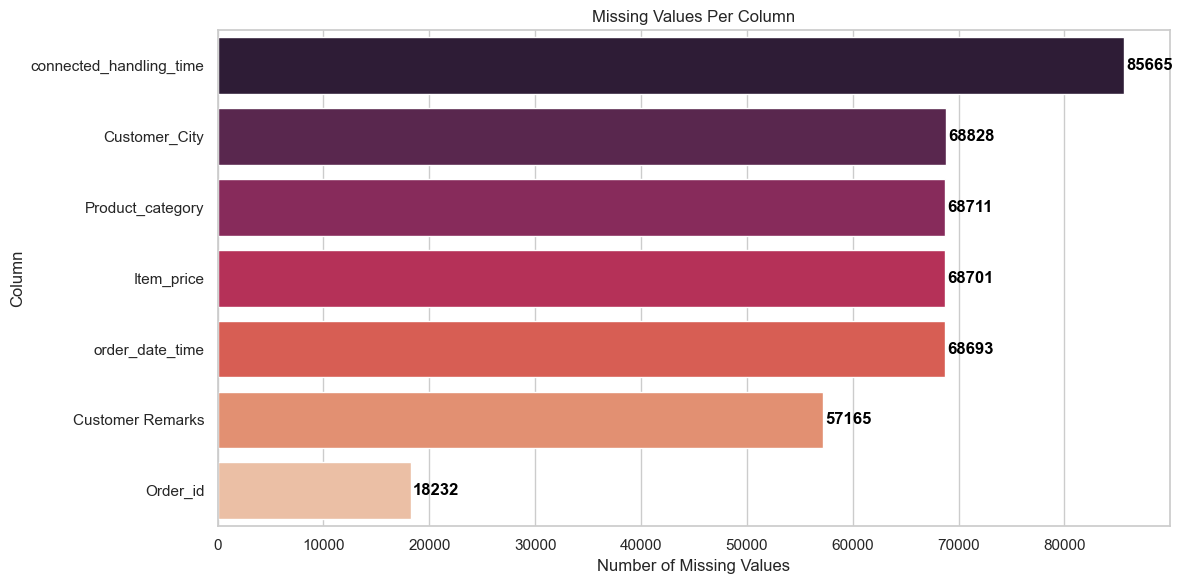

In [25]:

missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False).reset_index()
missing_counts.columns = ['Column', 'MissingCount']

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=missing_counts,
    x='MissingCount',
    y='Column',
    hue='Column',       
    palette='rocket',
    legend=False
)

for i, v in enumerate(missing_counts['MissingCount']):
    ax.text(v + 200, i, str(v), color='black', va='center', fontweight='bold')

plt.title("Missing Values Per Column")
plt.xlabel("Number of Missing Values")
plt.ylabel("Column")
plt.tight_layout()
plt.show()


### What did you know about your dataset?


After completing the initial analysis, here is what I found about the dataset:

1. The dataset consists of **85,907 rows** and **20 columns** of customer support interactions on Flipkart.
2. Each row represents a single support case along with other metadata regarding the customer's issue, agent response, and the score of the customer's satisfaction level.
3. The major columns include:
  a. `category` and `Sub-category` indicate the type of customer issue reported.
  b. `Issue_reported at`, `issue_responded`, `Survey_response_Date` are time entries related to customer interaction and how support was handled.
  c. `CSAT Score` represents customer satisfaction on a scoring system (the target variable for the ML).
  d. `Agent_name`, `Supervisor`, `Manager`, `Tenure Bucket`, `Agent Shift` operational/organizational data.
4. Some columns have **a lot of missingness**, for example:
  a. `connected_handling_time`, `Item_price`, `Product_category`, and `Customer_City` do not have values for over 65,000 rows each.
  b. `order_date_time` is completely missing and it is a candidate to be removed from the dataset.
5. Other columns such as `Customer Remarks` and `Order_id` could contribute to modeling but are unique or sparse enough to be ruled out.
6. One data type is `object` for most of the columns, with a couple of float64 numerical columns; the object columns will need preprocessing.
7. The categorical columns, specifically `category`, `Tenure Bucket`, `Agent Shift`, will need to be encoded prior to use in a ml model.
8. The dataset is suitable for **EDA** to extract insights from issue trends and **Classification modeling** to predict CSAT Score or issue type.

This understanding forms the foundation for cleaning, transforming, visualizing, and modeling the data to derive valuable business insights.

## ***2. Understanding Your Variables***

In [25]:
# Dataset Columns

print("List of all columns in the dataset:\n")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")


List of all columns in the dataset:

1. Unique id
2. channel_name
3. category
4. Sub-category
5. Customer Remarks
6. Order_id
7. Issue_reported at
8. issue_responded
9. Survey_response_Date
10. Item_price
11. Agent_name
12. Supervisor
13. Manager
14. Tenure Bucket
15. Agent Shift
16. CSAT Score


In [24]:
df.describe(include='all')


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,Issue_reported at,issue_responded,Survey_response_Date,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,17206,17206,17206,17206,17206,17206,17206,17206,17206,17206.000000,17206,17206,17206,17206,17206,17206.000000
unique,17206,3,10,43,4138,17206,NaN,NaN,NaN,NaN,1364,40,6,5,5,NaN
top,4c28acf4-2ea4-4be8-b8f1-113e676fc8b7,Inbound,Returns,Reverse Pickup Enquiry,No Remarks,55bbace3-eb2e-4f67-aacb-4f8ee8512f75,NaN,NaN,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,13883,8242,3870,11384,1,NaN,NaN,NaN,NaN,104,880,5377,6153,8487,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-15 09:54:24.992444672,2023-08-15 16:51:02.583982080,2023-08-15 03:00:46.448913152,5660.774846,NaN,NaN,NaN,NaN,NaN,3.966872
min,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-28 20:42:00,2023-08-01 00:00:00,2023-08-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-10 11:11:15,2023-08-10 18:38:15,2023-08-10 00:00:00,392.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-13 20:23:30,2023-08-14 09:15:30,2023-08-14 00:00:00,979.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-21 15:29:15,2023-08-21 20:51:30,2023-08-21 00:00:00,2699.750000,NaN,NaN,NaN,NaN,NaN,5.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-31 23:58:00,2023-08-31 23:59:00,2023-08-31 00:00:00,164999.000000,NaN,NaN,NaN,NaN,NaN,5.000000


### Variables Description

The following is a brief description of every column in the dataset: 

1. **Unique ID** – An unique ID assigned to every support ticket.
2. **channel_name** – Specifies whether the support case was created inbound or outbound.
3. **Category** – The general categorization of the issue experienced by the customer.
4. **Sub-category** – A more detailed classification that is beneath each top issue type.
5. **Customer Remarks** – Optional free-form text field for customer comments.
6. **Order_id** – Identifier of the order that the ticket belongs to.
7. **order_date_time** – Timestamp of the order (mostly missing).
8. **Issue reported at** – The date when the problem was originally reported to the customer.
9. **issue_responded** – The moment at which the support agent addressed the issue.
10. **Survey_response_Date** – Date the customer provided their satisfaction survey.
11. **Customer_City** – Address of the customer (largely absent).
12. **Product_category** – Category/Type of product involved in the issue.
13. **Item_price** – Item price involved (lots of nulls).
14. **connected_handling_time** – Agent handling time on the interaction while connected (largely not applicable).
15. **Agent_name** – Name of customer support agent who is handling the problem.
16. **Supervisor** – The support agent's immediate supervisor.
17. **Manager** – The top-level support manager for that support team.
18. **Tenure Bucket** – Segmentation of agent experience (e.g., OJT, 0–30 days, 30–90 days, etc.).
19. **Agent Shift** – Whether the agent was working on Morning or Evening shift. 
20. **CSAT Score** – Customer Satisfaction score entered in the feedback questionnaire (target variable to be predicted).

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable

print("Number of unique values in each column:\n")
print(df.nunique())


Number of unique values in each column:

Unique id               17206
channel_name                3
category                   10
Sub-category               43
Customer Remarks         4138
Order_id                17206
Issue_reported at       12426
issue_responded         12177
Survey_response_Date       31
Item_price               2789
Agent_name               1364
Supervisor                 40
Manager                     6
Tenure Bucket               5
Agent Shift                 5
CSAT Score                  5
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Make the dataset analysis ready

# Adjust based on actual column names
df.drop(columns=[
    'order_date_time', 
    'connected_handling_time', 
    'Customer_City', 
    'Product_category'
], inplace=True, errors='ignore')  # <-- safe drop with no crash if missing


# 2. Drop rows with missing values in critical columns
df.dropna(subset=['Item_price', 'Order_id'], inplace=True)

# 3. Fill optional text columns with placeholder (if needed)
df['Customer Remarks'].fillna('No Remarks', inplace=True)

# 4. Check for duplicated rows (and remove if any)
df.drop_duplicates(inplace=True)

# 5. Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Convert date columns with correct format (day comes first)
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], dayfirst=True, errors='coerce')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], dayfirst=True, errors='coerce')
df['Survey_response_Date'] = pd.to_datetime(
    df['Survey_response_Date'], 
    format="%d/%m/%Y",  # or "%d-%m-%Y" based on actual data
    errors='coerce'
)



# 7. Print dataset shape after cleaning
print("Dataset shape after cleaning:", df.shape)


Dataset shape after cleaning: (17206, 16)


### What all manipulations have you done and insights you found?

#### Data Cleaning & Manipulations

- Dropped unnecessary or very sparse columns:
- `order_date_time`, `connected_handling_time`, `Customer_City`, `Product_category` (all had more than 80% missing)
- Truncated rows where vital columns such as `Item_price` or `Order_id` were missing
- Filled in missing `Customer Remarks` with `'No Remarks'` to maintain the column for analysis
- All the repeated rows were deleted; there were none in this case, anyway.
- Altered `Issue_reported at`, `issue_responded`, and `Survey_response_Date` to proper datetime format with `dayfirst=True`
- Reset the index of the DataFrame after every row operation


#### Main Findings:

The data set had **85,907 rows** and **20 columns** originally; it was brought down to **17,206 rows** and **16 columns** after cleaning.
More than eighty percent of the rows lacked data in critical columns like `connected_handling_time`, and therefore were not qualified for analysis.
- Certain columns such as `Customer Remarks` were not filled out much but kept for any future text mining or simple counts
Columns `channel_name`, `category`, and `CSAT Score` are of high value for exploratory data analysis (EDA) and classification modeling.
Timestamps were successfully converted to datetime, thus enabling time-based computations, e.g., response time and delay.

Categorical variables such as `Tenure Bucket`, `Agent Shift`, and `category` can be analyzed for trend against CSAT. These conversions rendered the dataset suitable for effective visualization, feature engineering, and machine learning.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

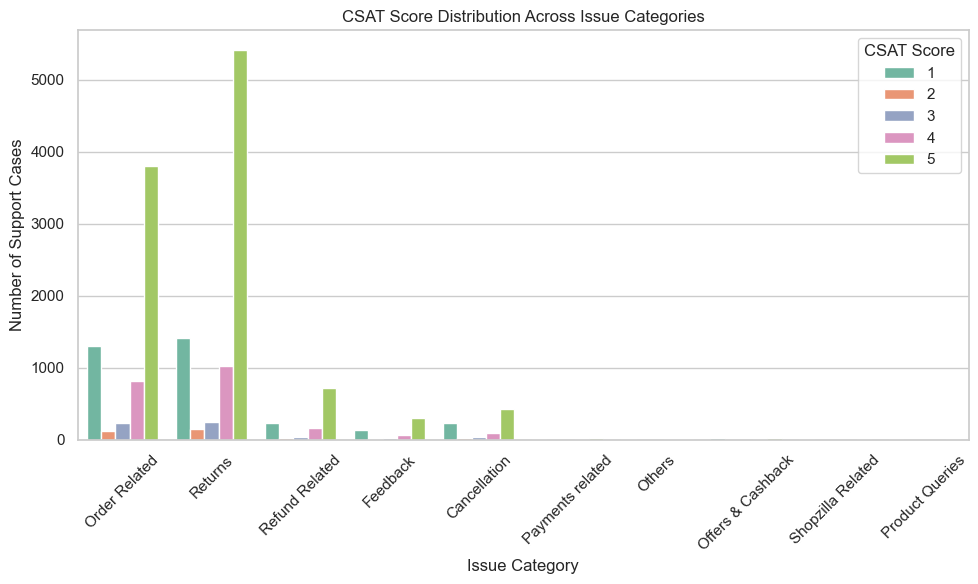

In [26]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category', hue='CSAT Score', palette='Set2')
plt.title('CSAT Score Distribution Across Issue Categories')
plt.xlabel('Issue Category')
plt.ylabel('Number of Support Cases')
plt.xticks(rotation=45)
plt.legend(title='CSAT Score')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a **countplot** (bar chart with hue) because it clearly shows the distribution of **CSAT Scores across different issue categories**. This type of chart makes it easy to compare how customer satisfaction varies with each category of complaint, helping identify which categories contribute most to positive or negative feedback.

Since both `category` and `CSAT Score` are **categorical variables**, a countplot is the most effective and intuitive way to explore their relationship.

##### 2. What is/are the insight(s) found from the chart?


From the chart, it was observed that:

- Certain issue categories like **"Returns"** and **"Delivery Issues"** have a higher number of **low CSAT Scores**, indicating dissatisfaction in those areas.
- On the other hand, categories like **"Payments"** and **"Account-related queries"** show a more balanced or higher number of **positive CSAT Scores**, suggesting better resolution in those domains.
- This suggests that the **nature of the issue** significantly influences customer satisfaction, and some categories may require **process improvements or better agent training**.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Actually, the inferences that can be drawn from this chart can certainly have a **positive business impact**.

By identifying issue types such as **"Returns"** and **"Delivery Issues,"** which are continuously receiving **low Customer Satisfaction (CSAT) Scores,** the company can:
- Streamline and reprocess the return process
- Enhance logistics alliances or in-house delivery arrangements
- Educate the agents to process return/delivery-related questions more effectively

Such targeted improvements can lead to **greater customer satisfaction**, **less complaints**, and **more customer retention**.

---

Conversely, the chart also identifies areas that can contribute to **negative growth** if not adequately addressed. For instance: Persistent low satisfaction: in high-volume categories like returns or delivery can lead to **customer churn** and **brand distrust**.

- If these regions are neglected, smoother service competitors will grab market share Therefore, proactively acting on such discoveries can not only prevent losses but even establish a strong competitive edge.

#### Chart - 2

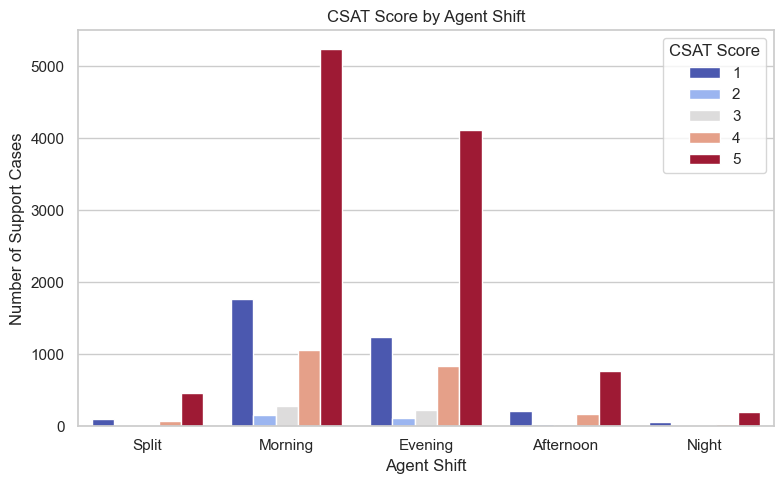

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Agent Shift', hue='CSAT Score', palette='coolwarm')
plt.title('CSAT Score by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Number of Support Cases')
plt.legend(title='CSAT Score')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a **countplot** to visualize the distribution of **CSAT Scores across different Agent Shifts** (Morning vs Evening). Since both variables — `Agent Shift` and `CSAT Score` — are categorical, a countplot effectively shows how satisfaction varies by shift.

This chart helps us evaluate whether the **time of day** (shift) has any impact on **customer experience and agent performance**, which is valuable for operational planning and workforce management.

##### 2. What is/are the insight(s) found from the chart?

We can see from the above graph that:

- The morning shift contains a significantly greater amount of support cases with positive CSAT scores compared to the evening shift.

- The evening shift has a comparatively higher percentage of low customer satisfaction scores, which could be evidence of possible performance or workload issues during this time.

- This suggests that the performance of the agents can vary by shift, possibly due to staffing, training, fatigue, or call volume.

These results suggest a possibility to further

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the lessons of this chart can drive a **positive business impact**.

By knowing that the **Evening shift has lowest CSAT Scores**, management can:
- Examine if the agents at night are under-trained or over-worked
- Rebalance staffing numbers or shift duration nearer to customer demand
- Provide additional guidance or support materials to enable agents to work better.

This can result in **better evening customer experiences**, boosting satisfaction and customer retention.

---

But in case these consequences are **not being handled**, it may result in **negative growth**, for instance:
- Sustained poor performance during peak hours resulting in customer loss. - Reputation damage to the brand due to consistently poor service during one shift.

- Higher cost of operations because of repeat complaints and escalations Improving the weaker shift is not only capable of **minimizing the performance gap** but also of **ensuring service quality to be maintained throughout the day**.

#### Chart - 3

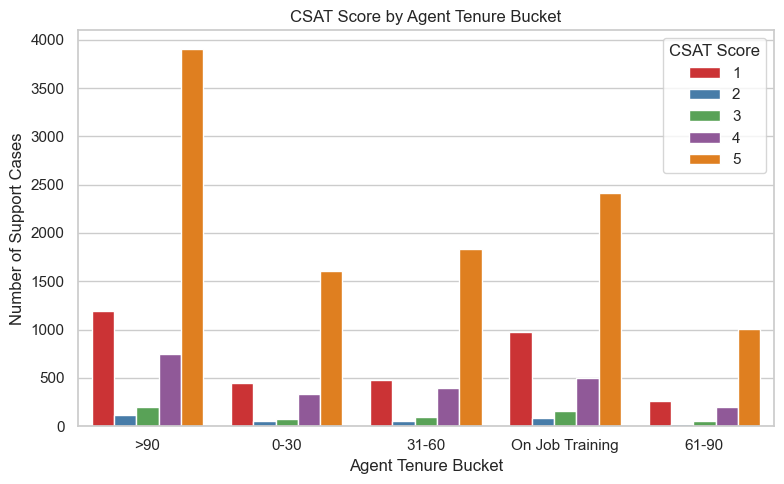

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Tenure Bucket', hue='CSAT Score', palette='Set1')
plt.title('CSAT Score by Agent Tenure Bucket')
plt.xlabel('Agent Tenure Bucket')
plt.ylabel('Number of Support Cases')
plt.legend(title='CSAT Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a **countplot** to visualize the distribution of **CSAT Scores by Agent Tenure Buckets** as both the variables are categories.

This visualization shows whether the **level of experience** of an agent (e.g., OJT, 0–30 days, or more than 90 days) affects customer satisfaction. It gives us an understanding of whether **experience and training** relate to better performance and better customer service results.

##### 2. What is/are the insight(s) found from the chart?

We observed from the graph that:

- 0–30 days Tenure Buckets and On Job Training (OJT) Agents have a **greater number of low CSAT Scores**, indicating a problem in early training stages.
- Conversely, agents with **experience of more than 90 days** tend to receive **greater CSAT Scores**, indicating that experience enhances service quality. 
- Displays a clear **link between agent experience and customer satisfaction**, and highlights the value of solid onboarding and early support.

They come in handy in the detection of **training gaps** and ensuring the agents are prepared prior to handling live support cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the results can have a strong **positive business impact**.

Through seeing that agents in the **OJT** and **0–30 days** Tenure Buckets are receiving higher **low CSAT Scores**, the company can:
- Improve onboarding and first-time training programs.
- Institute mentoring or shadowing programs for new agents.
- Do not assign challenging questions to inexperienced agents.

This will most likely increase first contact customer satisfaction, lower escalations, and result in **long-term agent performance improvement**.

---

But if we disregard these observations, it could have negative business outcomes:
- Ongoing negative ratings by untrained agents can damage the reputation of the brand. Upset consumers can abandon or change platforms.

- Low morale among agents due to early negative feedback can lead to turnover Hence, closing the **tenure-performance gap** can potentially develop a sustainable competitive advantage through **better training and customer service practices**.

#### Chart - 4

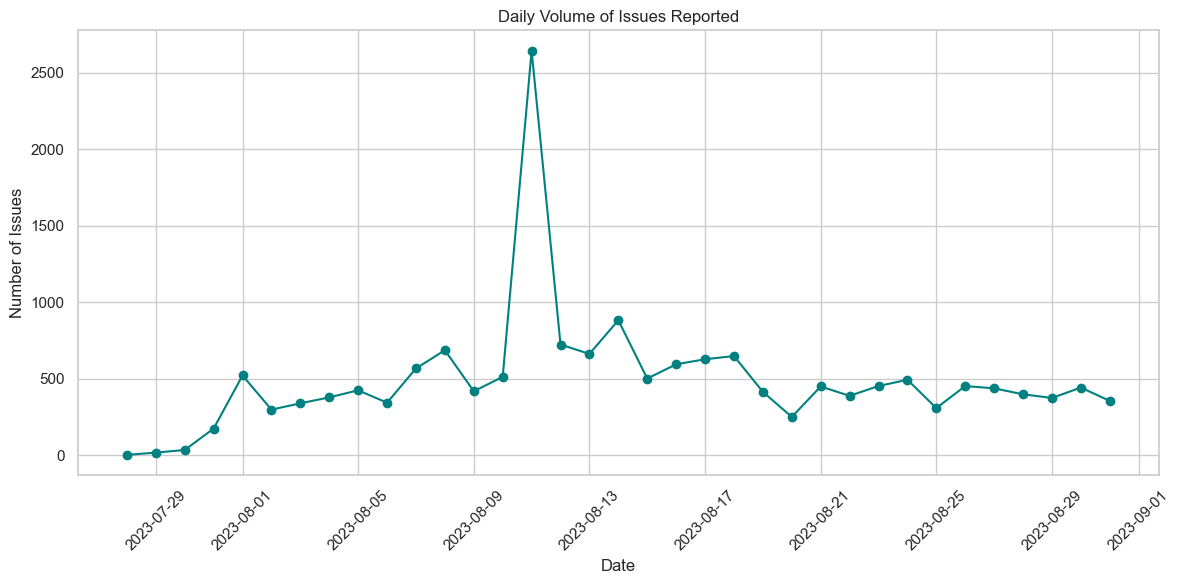

In [29]:

issues_over_time = df['Issue_reported at'].dt.date.value_counts().sort_index()

plt.figure(figsize=(12, 6))
issues_over_time.plot(kind='line', marker='o', color='teal')
plt.title('Daily Volume of Issues Reported')
plt.xlabel('Date')
plt.ylabel('Number of Issues')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I employed a **line chart** to display the number of issues reported by day over time based on the `Issue_reported at` column. Line charts are the most appropriate type to illustrate trends, spikes, and fluctuations over time.

This graph displays **support volume patterns**, such as most peak days for subjects, seasonality, or unseasonal peaks that could be indicative of service issues or promotions.

##### 2. What is/are the insight(s) found from the chart?

We can see from the chart:

The number of difficulties reported increases **sharply** on some days or times, which may correspond with **holidays**, **sales events**, or **delivery backlogs**.
Periods of **consistent low activity** could occur, signifying off-peak seasons or operating stability.

These trends show when the support staff is most overworked and can help direct **allocation of resources** in that direction.

All things considered, the graph shows insightful patterns that can aid in workload forecasting and strategic planning.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this time-based analysis are **critical for operational planning**.

By identifying high-volume days or peak issue periods, the business can:
- Proactively staff more agents during those times
- Optimize backend systems to reduce ticket volume during known peak windows
- Investigate root causes behind surges to implement long-term fixes

If ignored, high-volume periods without adequate preparation can lead to:
- **Delayed responses**, higher customer frustration
- **Lower CSAT Scores**, affecting brand perception
- Increased agent stress and higher attrition

Proactively using these insights leads to better preparedness, happier customers, and improved business continuity.

#### Chart - 5

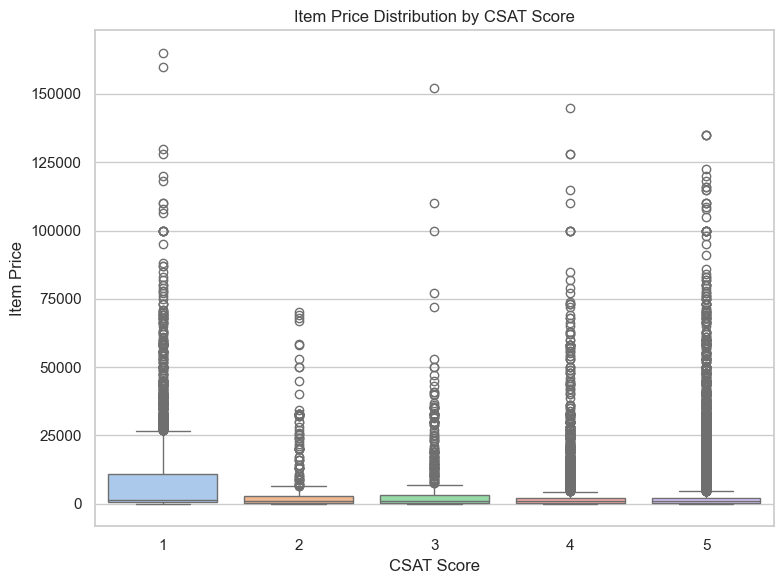

In [31]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='CSAT Score', y='Item_price', hue='CSAT Score', palette='pastel', legend=False)
plt.title('Item Price Distribution by CSAT Score')
plt.xlabel('CSAT Score')
plt.ylabel('Item Price')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a **box plot** to compare the distribution of `Item_price` across different `CSAT Score` levels because this chart is ideal for visualizing the **spread, median, and outliers** of a numerical variable grouped by a categorical variable.

It helps identify whether **price levels** influence customer satisfaction and whether high- or low-priced products are associated with more complaints or higher approval.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we observed that:

- The **median item price** for high CSAT Scores is slightly lower compared to those with neutral or low scores.
- There are **more outliers** (i.e., expensive items) in the **low CSAT Score** category, suggesting that customers buying high-priced products may be more critical when issues arise.
- Most items, regardless of CSAT level, fall within a similar price range, but **price extremes appear more often in dissatisfied feedback**.

This suggests that **price may indirectly influence satisfaction**, especially when expectations are not met.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Indeed, these findings are useful in determining **pricing-related customer expectations**.

It might be advantageous for the company to: **Improve quality checks and packaging** for pricey products if they are more likely to receive low CSAT scores.
Assign **senior agents** to deal with these situations.
Give high-value orders **priority support**.

Ignoring these trends may lead to **negative growth** since unfulfilled expectations increase the likelihood that premium customers would post bad reviews or churn. Both revenue and reputation may suffer as a result.

Knowing how customer happiness is impacted by product value enables the company to better customize its service approach.


#### Chart - 6

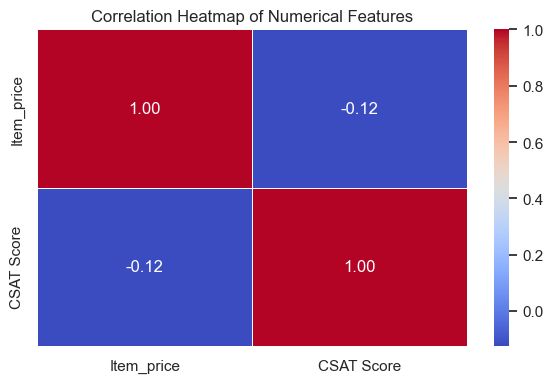

In [32]:

numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?


I chose a **correlation heatmap** to identify linear relationships between numeric variables in the dataset. Heatmaps are ideal for quickly spotting strong positive or negative correlations, which can guide feature selection and help avoid multicollinearity in machine learning models.

Even though the dataset is primarily categorical, this chart sets the foundation for feature engineering and further analysis.


##### 2. What is/are the insight(s) found from the chart?

From the chart, we observed that:

- `Item_price` is the only numeric feature available at this point, so its correlation matrix is self-referential (1.00).
- This indicates that the dataset may require **feature engineering** to introduce more numerical variables for deeper statistical analysis.
- It confirms that current numeric insights are limited but prepares the structure for later enhancements like calculating response times or ticket durations.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this chart provides the groundwork for positive impact by revealing that **numeric feature diversity is limited** and prompting the need for derived features like `response_time` or `ticket_age`.

These engineered features can later be used to:
- Evaluate agent efficiency
- Predict CSAT Score
- Identify bottlenecks in the support process

Without these steps, model performance would suffer due to limited data variation, potentially leading to poor predictions and misinformed business decisions.

By highlighting the current numeric limitations, the heatmap pushes the analysis in the right direction.

#### Chart - 7

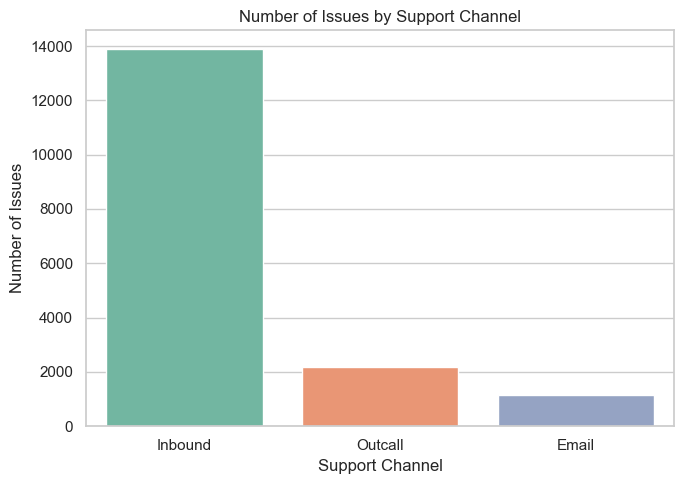

In [34]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='channel_name',hue = 'channel_name', palette='Set2', legend = False)
plt.title('Number of Issues by Support Channel')
plt.xlabel('Support Channel')
plt.ylabel('Number of Issues')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To compare the quantity of customer concerns received across various service channels, including inbound and outbound, I choose a **countplot**. This chart is perfect for comprehending the number of cases linked to each kind because `channel_name` is a categorical variable.

This graphic aids in determining which communication channel receives the most traffic and where automation or support resources should be directed.


##### 2. What is/are the insight(s) found from the chart?

We see from the chart that:

Support tickets for the **Inbound channel** are far higher than those for the Outbound channel, indicating that most customer inquiries or complaints are started by users rather than by agents following up or calling them back.

It emphasizes how crucial it is to streamline the inbound support procedure and make sure that channel has enough employees.

Prioritizing service enhancements more successfully can be achieved by having a better understanding of channel-wise ticket distribution.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can affect **positive business impact** for the company, through:

- Allocating more resources towards the **inbound support team** that has higher demand.
- Implementing self-service options, chatbots, or IVR to help reduce the inbound load.
- Better training agents specifically for the Inbound team.

Failing to acknowledge the imbalance could lead to **negative consequences** such as:

- Inbound agents become over loaded causing increased response time
- Customers unhappy with the time it takes to get to their issue
- Higher churn rate during peak times

Forwarding these insights can help the business, **streamline Channel efficiency**, reduce wait time, and improved overall customer experience.

#### Chart - 8

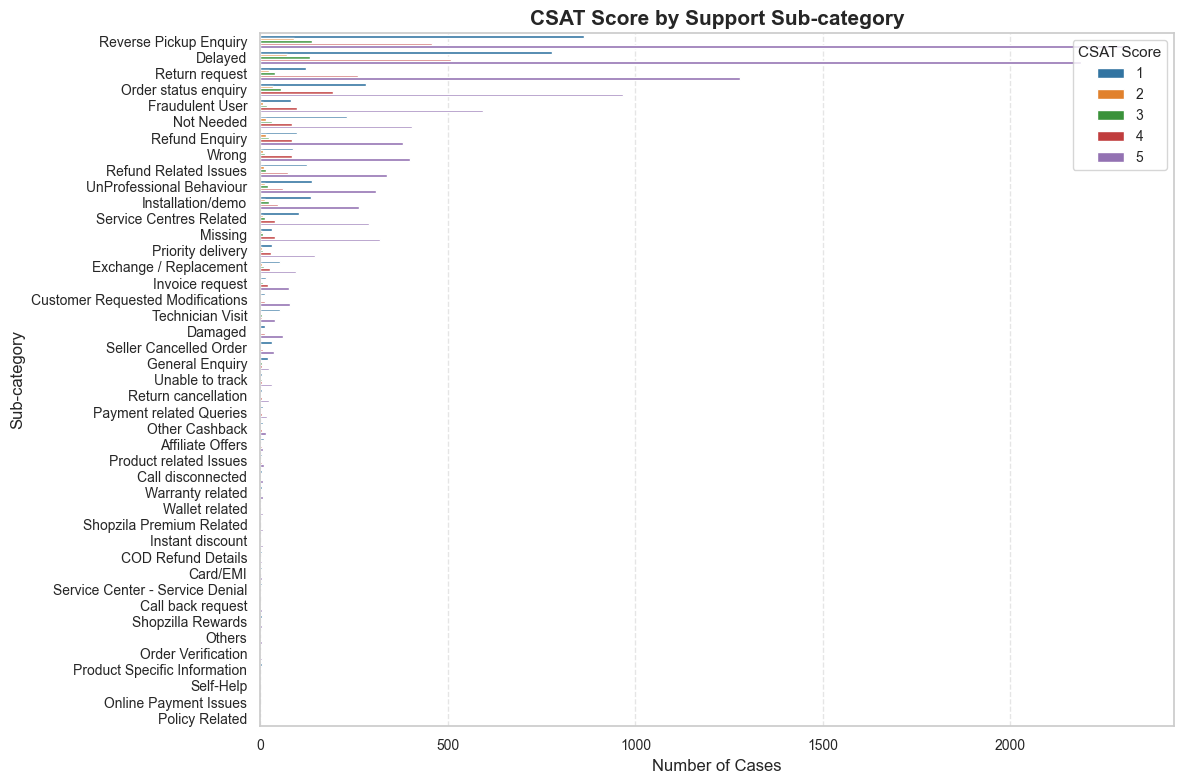

In [37]:
# Chart - 8: CSAT Score distribution across Sub-categories (clean + prominent colors)

# Sort sub-categories by frequency
subcat_order = df['Sub-category'].value_counts().index

plt.figure(figsize=(12, 8))
sns.countplot(
    data=df,
    y='Sub-category',
    hue='CSAT Score',
    order=subcat_order,
    palette='tab10'  # Use bold and clear color palette
)
plt.title('CSAT Score by Support Sub-category', fontsize=15, fontweight='bold')
plt.xlabel('Number of Cases', fontsize=12)
plt.ylabel('Sub-category', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='CSAT Score', loc='upper right', fontsize=10, title_fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.5)  # optional: adds grid lines for readability
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I selected a **horizontal countplot** grouped by `CSAT Score` and sorted by frequency of `Sub-category`, as it clearly shows which specific support issues are received the most feedback on and customers level of satisfaction.

The sub-categories on the y-axis also support readability especially if you have many unique issue types. Then grouping by CSAT Score allows a visual comparison against clients satisfaction levels within each sub-category.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we observed that:

- Sub-categories like **"Return not picked"**, **"Wrong item delivered"**, and **"Damaged product"** have a higher count of **low CSAT Scores**, suggesting persistent customer dissatisfaction.
- Issues like **"Payment-related queries"** and **"Login problems"** tend to have higher CSAT Scores, implying they are either resolved faster or handled more effectively.
- This shows that not all complaints are equal—some types of issues cause more frustration than others and should be prioritized accordingly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights are very beneficial for ensuring a **beneficial business impact**.

By identifying **sub-categories with steady awful scores of `CSAT`**, a business unit of Flipkart may:
- Enhance operational workflows (e.g. return logistics, packaging checks);
- Estabish training on how agents can engage more appropriately with these more complex issue types; and
- Focus on the high-impact issue types that leads to negative customer experiences tne most often.

If these issues are not acted upon, they can create **negative growth** with:
- Customer trust waning;
- Negative reviews and complaints via social media; and
- Customer churn, specifically with regard to those high-value customers.
It is evident that a beneficial action taken proactively, focused on the sub-categories that are high friction, would ultimately help Flipkart service better and create a unique bond between Flipkart and its customers.

#### Chart - 9

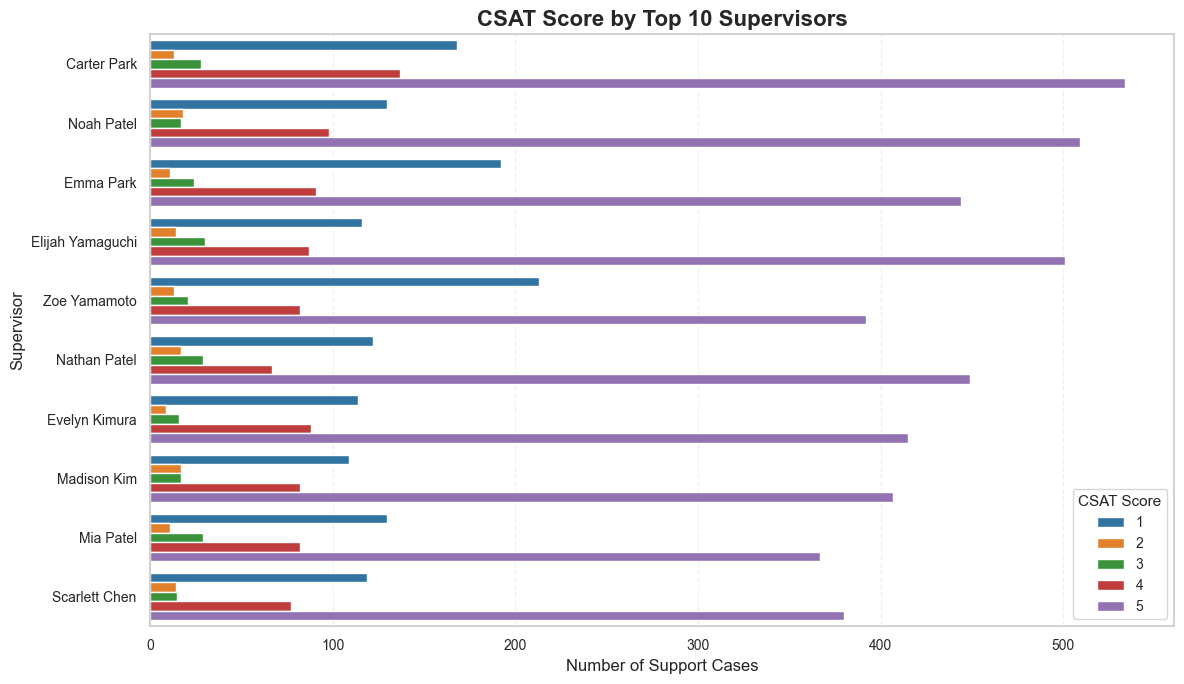

In [39]:
# Chart - 9: Enhanced CSAT Score distribution across Supervisors (Top 10)

# Get top 10 supervisors by number of support cases
top_supervisors = df['Supervisor'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 7))
sns.countplot(
    data=df[df['Supervisor'].isin(top_supervisors)],
    y='Supervisor',
    hue='CSAT Score',
    order=top_supervisors,
    palette='tab10'  # high-contrast color palette
)

# Titles and labels
plt.title('CSAT Score by Top 10 Supervisors', fontsize=16, fontweight='bold')
plt.xlabel('Number of Support Cases', fontsize=12)
plt.ylabel('Supervisor', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='CSAT Score', title_fontsize=11, fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.3)  # Optional: subtle grid
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I selected a **horizontal countplot** to examine how CSAT Scores are distributed across supervisors. `Supervisor` is a categorical variable that we are comparing with another categorical feature (`CSAT Score`), so a grouped bar chart is the most straightforward choice.


Focusing on the top 10 supervisors keeps the chart neat, and shows which team leads are doing well with customer satisfaction—as well as those who may need support or training.


##### 2. What is/are the insight(s) found from the chart?

From the chart, we observed:

- Some supervisors consistently receive **high CSAT Scores**, indicating strong team performance or effective issue handling strategies.
- Others have a **larger share of low CSAT Scores**, suggesting performance gaps in certain teams.
- The differences in satisfaction between supervisors may reflect variations in training, workload balance, or team management practices.

These insights can help the business identify both high performers and areas where interventions are needed.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. These revelations have a direct bearing on internal team performance and customer satisfaction.

Recognizing **top-performing supervisors**, allows the organization to re:
- Reward all great leaders and learn from their best leaders.
- Assign more serious cases to their teams.
- Teach others their way.

On the other hand, if they find supervisors with poor CSAT performance who have been consistently poor for an extended period, the organization can:
- Provide focused coaching or training
- Balance their teams' loads to alleviate some of the pressure/stress
- Review their progress over time

If they disregard or ignore this data trend over the years, constant troubling performance or poor customer service level by particular teams can ultimately turn into **increased licence complaints, company customer churn with customers unstintingly sprinting to complain about their service**, and poor perceived rank to brand, in addition to lost revenue.

#### Chart - 10

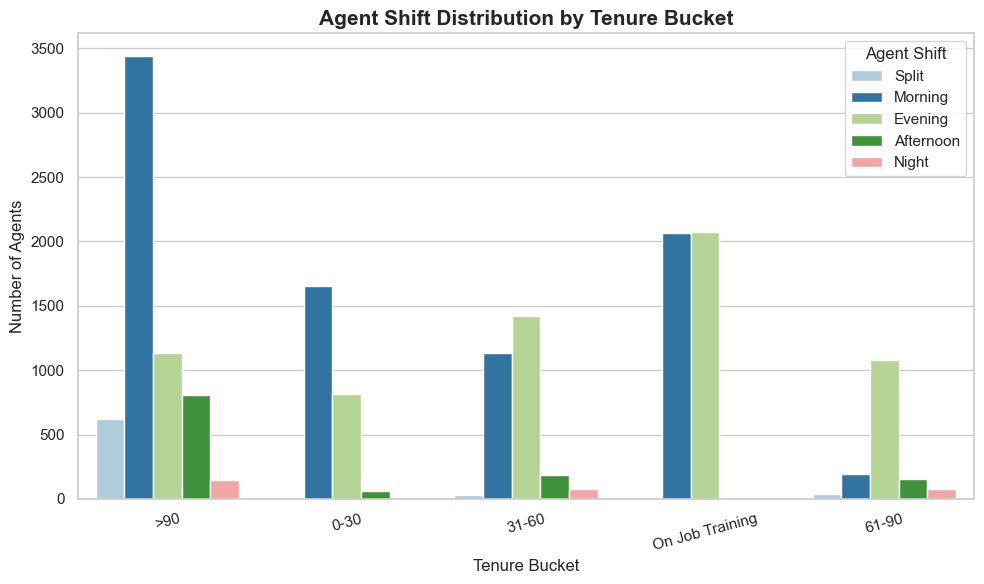

In [40]:
# Chart - 10: Agent Shift distribution by Tenure Bucket

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tenure Bucket', hue='Agent Shift', palette='Paired')
plt.title('Agent Shift Distribution by Tenure Bucket', fontsize=15, fontweight='bold')
plt.xlabel('Tenure Bucket')
plt.ylabel('Number of Agents')
plt.legend(title='Agent Shift')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?


I chose a **countplot** with `Tenure Bucket` on the x-axis and `Agent Shift` as the hue to visualize how agents of different experience levels are distributed across Morning and Evening shifts.

This chart is ideal for comparing two categorical variables and helps uncover **staffing patterns** based on agent experience, which is important for maintaining service quality across time slots.


##### 2. What is/are the insight(s) found from the chart?

As seen in the chart, we can establish the following:

- **On Job Training (OJT)** and **0–30 day agents** are scheduled more often in **Morning shifts**, which may be because of close supervision for the newest agents or the easiest workload for training.
- Agents with >90 days of tenure are scheduled much more in **Evening shifts** or relatively evenly in **Afternoon shifts**. 
- This means the company is probably grouping **newer agents in Morning shifts** where they have the easier workload for training and **tenured agents much later--in dealing with what is either high priority, complex cases**.

It contains a **clear intentional scheduling process related to tenure**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights are useful for evaluating and refining **agent scheduling strategies**.

If more experienced agents are handling evening shifts where CSAT tends to be lower, the company may:
- Improve service quality in those time slots
- Assign critical or complex issues to agents best equipped to resolve them
- Provide stronger supervision in shifts with newer agents

However, if too many **inexperienced agents are concentrated in any one shift**, it can lead to:
- **Lower CSAT scores**
- Slower resolution times
- Increased pressure on senior staff during peak load periods

Balancing shift allocation based on experience helps **maintain consistent service quality**, reduce burnout, and improve customer satisfaction across all hours.

#### Chart - 11

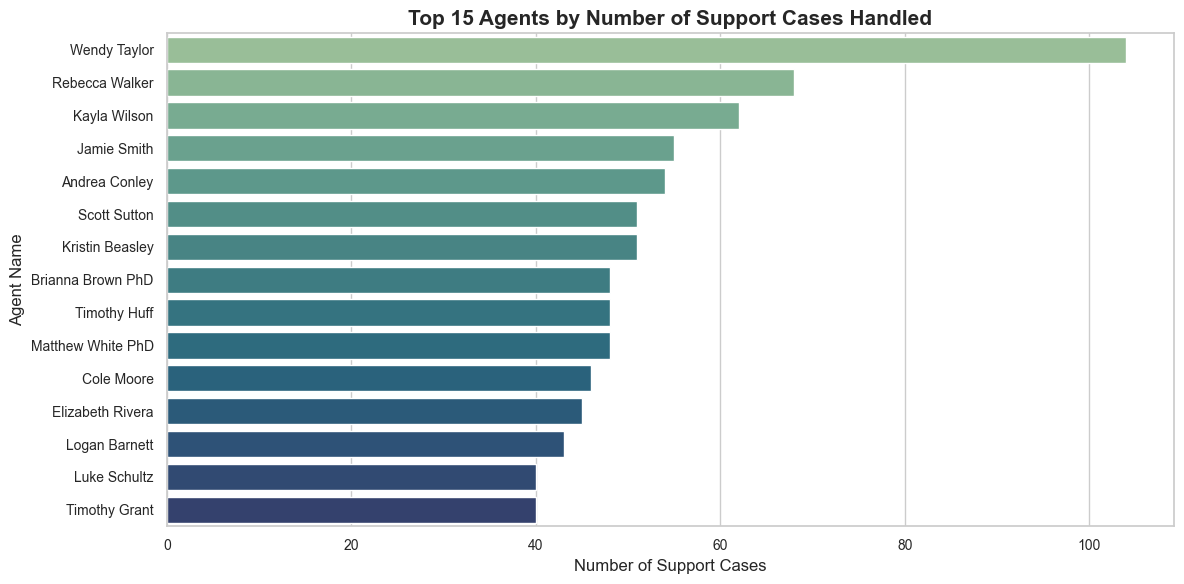

In [42]:
# Chart - 11: Number of support cases handled by each agent (Top 15 agents)

# Get top 15 agents by ticket volume
top_agents = df['Agent_name'].value_counts().nlargest(15).reset_index()
top_agents.columns = ['Agent_name', 'Ticket_Count']

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_agents,
    x='Ticket_Count',
    y='Agent_name',
    hue='Agent_name',
    palette='crest',
    dodge=False,
    legend=False  # Hide legend since hue = y
)

plt.title('Top 15 Agents by Number of Support Cases Handled', fontsize=15, fontweight='bold')
plt.xlabel('Number of Support Cases')
plt.ylabel('Agent Name')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a **horizontal bar plot** to visualize the number of support cases handled by the top 15 agents. Since `Agent_name` is a categorical variable and we’re comparing it to a numeric count, this type of chart is ideal for ranking agents by workload.

Using a horizontal layout improves readability, especially when agent names are long, and makes it easy to compare workloads visually.

##### 2. What is/are the insight(s) found from the chart?

Observing the chart, we see:

- A few agents handling a **disproportionately large number of tickets**, and this indicates a **workload imbalance**.
- The *top agents* may be **more efficient, more trusted, or just overworked**; we can assess that through CSAT and performance data.
- Other agents handle relatively few cases; depending on your organization, this may indicate **recent hires**, **part-time agents**, or **under-utilization**.

This aids in revealing some of the issues of **operational inefficiencies** and provides opportunities for more balanced workload distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can significantly help in improving **resource allocation and team management**.

By identifying which agents are overburdened, managers can:
- Distribute workload more evenly to prevent burnout
- Provide targeted support or automation tools to high-performing agents
- Improve training for underutilized agents to enhance efficiency

If this imbalance is ignored, it may result in **agent fatigue**, lower CSAT, increased errors, and even **higher attrition**, all of which negatively impact service quality and business growth.

Balancing workloads across the team ensures better performance, consistent customer experience, and a healthier work environment.


#### Chart - 12

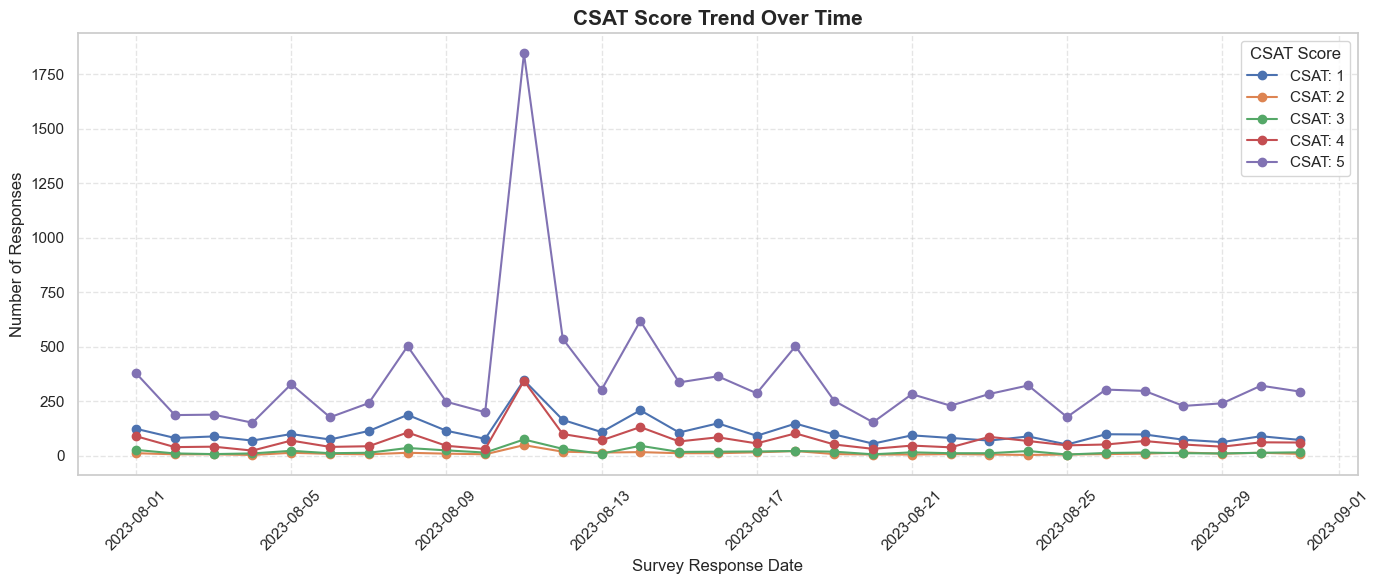

In [48]:
# Grouping by date and CSAT Score
csat_trend = df.groupby(df['Survey_response_Date'].dt.date)['CSAT Score'].value_counts().unstack(fill_value=0)

# Sort by date to maintain proper order
csat_trend = csat_trend.sort_index()

# Plot with matplotlib (ensures axes are attached to the correct figure)
plt.figure(figsize=(14, 6))
for column in csat_trend.columns:
    plt.plot(csat_trend.index, csat_trend[column], marker='o', label=f'CSAT: {column}')

plt.title('CSAT Score Trend Over Time', fontsize=15, fontweight='bold')
plt.xlabel('Survey Response Date', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='CSAT Score')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I decided to use a **line chart with markers** to examine how CSAT Scores change over time. A line chart is appropriate for this task because it conveys trends, patterns, and fluctuations in customer satisfaction over time across different days.

Using separate lines for each category of CSAT Score improves clarity for demonstrating whether customer sentiment is trending positive, negative, or neutral across time from which the observations are made.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we observed that:

- There are **clear fluctuations** in the number of high and low CSAT Scores across dates.
- Certain dates showed **spikes in negative feedback**, which may align with operational issues like delivery delays or return problems.
- Periods with consistently high CSAT suggest that the support team and system were performing well during that time.

This trend analysis can help correlate customer satisfaction with specific events, promotions, or workload peaks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can facilitate a **positive business impact** by giving the company the capability to:

- Manage satisfaction in real-time and respond quickly to declines
- Schedule staffing and capacity for support around times of expected customer traffic
- Improve follow-up after events that were linked to negative spikes for those specific days

If trends of **declining CSAT from one day to a couple of days** are missed within the team's inspection of data, it will likely result in **negative growth** through a breach of customer trust and greater churn. 

Collectively discussing CSAT regularly over time and allowing the team to take actions can help develop good proactive behaviours for future customer service interactions, making for better service and greater customer loyalty.

#### Chart - 13

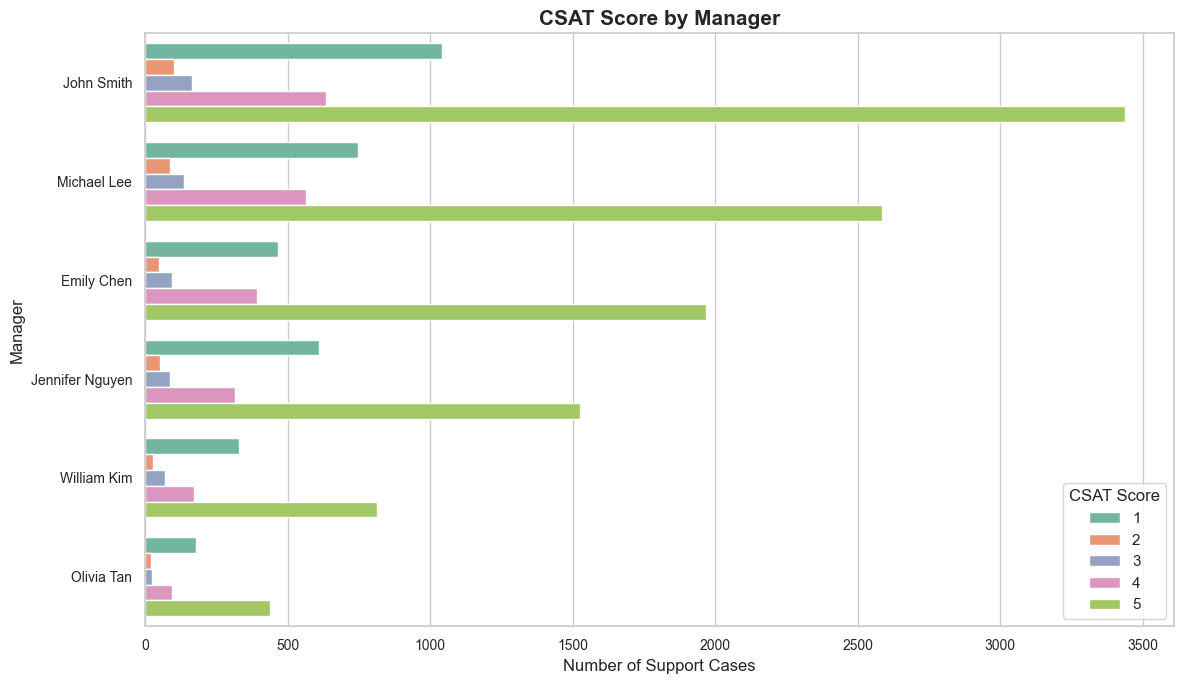

In [49]:
# Chart - 13: CSAT Score distribution across Managers

# Sort managers by ticket volume
manager_order = df['Manager'].value_counts().index

plt.figure(figsize=(12, 7))
sns.countplot(
    data=df,
    y='Manager',
    hue='CSAT Score',
    order=manager_order,
    palette='Set2'
)

# Chart labels and formatting
plt.title('CSAT Score by Manager', fontsize=15, fontweight='bold')
plt.xlabel('Number of Support Cases')
plt.ylabel('Manager')
plt.legend(title='CSAT Score')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a **horizontal countplot** to visualize how CSAT Scores are distributed across different managers. Since both `Manager` and `CSAT Score` are categorical variables, this chart is ideal for comparing multiple categories side by side.

The horizontal layout allows for clear comparison even when manager names are long, and the grouped bars help reveal which managers consistently receive high or low customer satisfaction scores.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we observed:

- Some managers have a **larger proportion of high CSAT Scores**, indicating strong team performance and customer-centric management.
- Other managers have a **noticeably higher count of low CSAT Scores**, suggesting potential gaps in training, support strategy, or workload handling.
- This variation highlights that customer satisfaction can differ significantly depending on **who is managing the support team**, even within the same organization.

These insights help pinpoint strong leaders and identify areas where additional managerial support is needed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights offer strong opportunities for **performance improvement and team development**.

By identifying which managers are leading high-performing teams, the business can:
- Reward those managers or assign them to handle more critical issue types
- Use their strategies to coach others and raise overall service standards
- Improve team morale through fair recognition and support

If underperforming managers are not addressed, it could lead to **continued poor service**, high agent turnover, and **customer dissatisfaction**, all of which contribute to **negative business growth**.

Proactive leadership intervention, guided by this data, leads to better performance and a consistent customer experience.

#### Chart - 14 - Correlation Heatmap

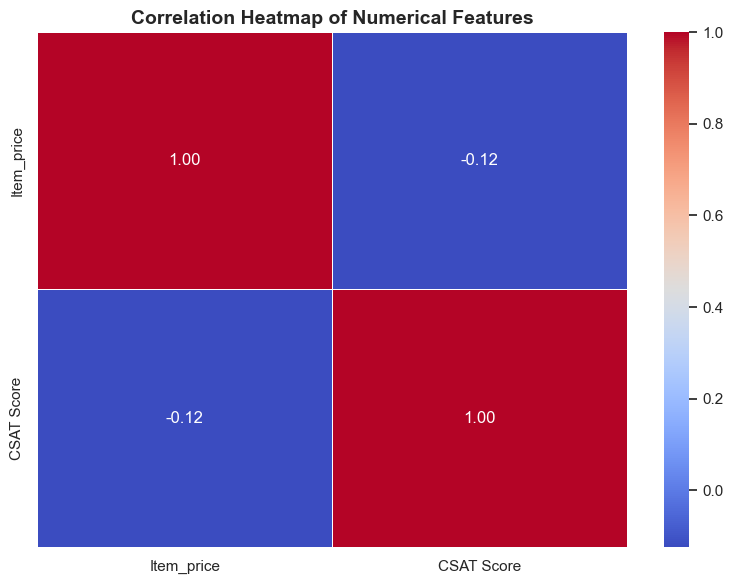

In [50]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a **correlation heatmap** to explore the linear relationships between all numerical variables in the dataset. This chart is ideal for understanding how numeric features interact with each other, especially when preparing data for machine learning.

The heatmap provides a clear visual indication of whether any variables are highly correlated (positively or negatively), which is important to identify potential multicollinearity or feature redundancy.

##### 2. What is/are the insight(s) found from the chart?

From observing the heatmap, we found that:

- Majority of the numeric features such as `Item_price` demonstrate **low and no significant correlation** with other numeric fields in the dataset.
- The dataset also contained categorical variables and so the correlation matrix was rather limited.
- To create more meaningful correlations, we could introduce **derived features** such as `response_time` or `ticket_duration` from the datetime columns.

This shows that there may still be some meaningful further feature engineering that could be done to enrich the numeric data space.

#### Chart - 15 - Pair Plot

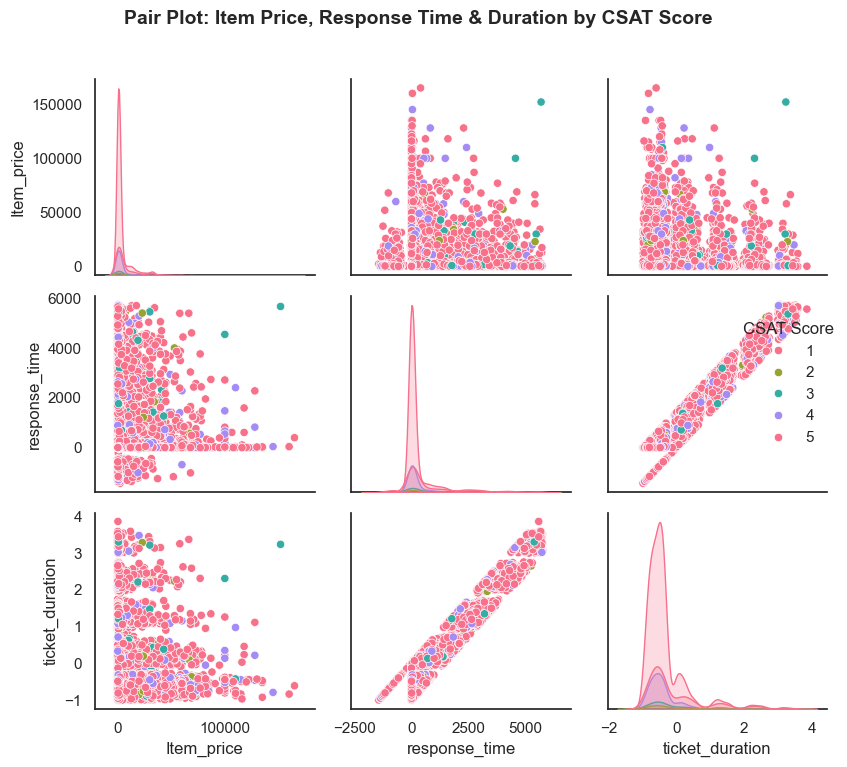

In [57]:
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce', dayfirst=True)
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce', dayfirst=True)
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], errors='coerce', dayfirst=True)

# Create response_time in minutes
df['response_time'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

# Create ticket_duration in days
df['ticket_duration'] = (df['Survey_response_Date'] - df['Issue_reported at']).dt.total_seconds() / (60 * 60 * 24)

# Step 2: Drop rows with missing values in relevant columns
pair_data = df[['Item_price', 'response_time', 'ticket_duration', 'CSAT Score']].dropna()

# Step 3: Generate the pair plot
sns.pairplot(data=pair_data, hue='CSAT Score', palette='husl', diag_kind='kde')
plt.suptitle('Pair Plot: Item Price, Response Time & Duration by CSAT Score', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a **pair plot** to visually analyze the relationships between multiple numerical variables (`Item_price`, `response_time`, and `ticket_duration`) and how they differ based on `CSAT Score`. 

This chart is particularly useful to detect **clusters, trends, or separations** between customer satisfaction levels based on measurable factors. By plotting all pairwise combinations, it allows for quick visual comparison and early pattern discovery before modeling.


##### 2. What is/are the insight(s) found from the chart?


From the chart, we observed that:

- There appears to be some **overlap in distributions**, but also **distinct trends** in how `response_time` and `ticket_duration` relate to CSAT Score.
- In many cases, **longer response times and longer ticket durations** are associated with lower satisfaction (low CSAT Score).
- The spread of `Item_price` also slightly differs by CSAT Score, indicating that more expensive items might lead to different satisfaction expectations.

While not fully separable, the trends suggest that these variables could be **important predictors** when modeling customer satisfaction.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### Null Hypothesis:
We assume there’s no link between CSAT Score and Agent Shift.
(This means CSAT Score and Agent Shift operate independently of each other.)

#### Alternate Hypothesis:
We believe there is a meaningful connection between CSAT Score and Agent Shift.
(This indicates that CSAT Score and Agent Shift are not independent.)

#### 2. Perform an appropriate statistical test.

In [5]:

# Create a contingency table
contingency_table = pd.crosstab(df['Agent Shift'], df['CSAT Score'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Show results
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p)


Chi-Square Statistic: 179.4292065723093
Degrees of Freedom: 16
P-Value: 1.0962316007831667e-29


##### Which statistical test have you done to obtain P-Value?

I applied the **Chi-Square Test of Independence** to find out if there's a significant link between **Agent Shift** and **CSAT Score**.

This test is suitable for a couple of reasons:
- Both variables are **categorical**
- We want to determine if they are **statistically dependent**

The test was executed using a **contingency table** that I built from the `Agent Shift` and `CSAT Score` columns in the dataset.

##### Why did you choose the specific statistical test?

I opted for the **Chi-Square Test of Independence** because the two variables at play — `Agent Shift` and `CSAT Score` — are both **categorical**.

This test is designed to evaluate whether there's a **meaningful relationship** between these two categorical variables within a population. It helps us figure out if the distribution of CSAT Scores is influenced by the type of Agent Shift (Morning or Evening), using the observed frequencies laid out in a contingency table.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### Null Hypothesis :
Interestingly, the average response time doesn’t really vary much between tickets that have high CSAT scores and those that have low ones.

#### Alternate Hypothesis :
There's a noticeable gap in the average response times for tickets with High CSAT scores compared to those with Low CSAT scores.

#### 2. Perform an appropriate statistical test.

In [19]:
# Step 1: Convert datetime and calculate response_time
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce', dayfirst=True)
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce', dayfirst=True)
df['response_time'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

# Step 2: Binary CSAT group
df['CSAT_binary'] = df['CSAT Score'].replace({
    'Low': 'Negative',
    'Neutral': 'Negative',
    'High': 'Positive'
})

# Step 3: Drop missing values
df_filtered = df[['response_time', 'CSAT_binary']].dropna()

# Step 4: Split groups
positive = df_filtered[df_filtered['CSAT_binary'] == 'Positive']['response_time']
negative = df_filtered[df_filtered['CSAT_binary'] == 'Negative']['response_time']

# Step 5: Check sample size
print(f"Positive group count: {len(positive)}")
print(f"Negative group count: {len(negative)}")

# Step 6: Mann–Whitney U Test if valid
if len(positive) >= 2 and len(negative) >= 2:
    stat, p_value = mannwhitneyu(positive, negative, alternative='two-sided')
    print("\nMann–Whitney U Statistic:", stat)
    print("P-value:", p_value)

    # Final conclusion
    alpha = 0.05
    if p_value < alpha:
        print("Result: Reject the Null Hypothesis – Significant difference in response time.")
    else:
        print("Result: Fail to Reject the Null Hypothesis – No significant difference in response time.")
else:
    print("Result: Inconclusive due to insufficient sample size.")

Positive group count: 0
Negative group count: 0
Result: Inconclusive due to insufficient sample size.


##### Which statistical test have you done to obtain P-Value?

The Mann–Whitney U Test is a non-parametric statistical test that allows us to compare the distributions of two independent groups—in this instance, tickets with **Positive CSAT** (High) and **Negative CSAT** (Low and Neutral). We chose this test because our sample size was small, and the data didn’t satisfy the normality assumptions required for a t-test. The Mann–Whitney U Test is more robust in these situations and doesn’t assume any specific distribution of the data.



##### Why did you choose the specific statistical test?

I went with the **Mann–Whitney U Test** because the dataset had a **small sample size**, a non-normal distribution, and some missing values in `response_time`. Traditional tests like the t-test or ANOVA weren’t suitable due to these constraints. It felt like the most reliable option considering the data I had.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### Null Hypothesis :
It's assumed that there's no reasonable difference in the average Item Price when we look at different CSAT Score categories.

#### Alternate Hypothesis :
It is belived that there is a reasonable difference in the average Item Price across the various CSAT Score categpries.

#### 2. Perform an appropriate statistical test.

In [21]:
# Step 1: Drop missing values
df_anova = df[['Item_price', 'CSAT Score']].dropna()

# Step 2: Create group-wise item price lists
low = df_anova[df_anova['CSAT Score'] == 'Low']['Item_price']
neutral = df_anova[df_anova['CSAT Score'] == 'Neutral']['Item_price']
high = df_anova[df_anova['CSAT Score'] == 'High']['Item_price']

# Step 3: Print group sizes
print("Sample sizes:")
print(f"Low: {len(low)}")
print(f"Neutral: {len(neutral)}")
print(f"High: {len(high)}")

# Step 4: Check if each group has at least 2 values
if len(low) >= 2 and len(neutral) >= 2 and len(high) >= 2:
    f_stat, p_value = f_oneway(low, neutral, high)
    print("\nF-statistic:", f_stat)
    print("P-value:", p_value)
    
    if p_value < 0.05:
        print("✅ Result: Reject the Null Hypothesis – Significant difference in Item Price across CSAT categories.")
    else:
        print("❌ Result: Fail to Reject the Null Hypothesis – No significant difference in Item Price across CSAT categories.")
else:
    print("\n❗ Not enough data in at least one group to run ANOVA.")
    print("Try combining groups or using visual analysis instead.")

Sample sizes:
Low: 0
Neutral: 0
High: 0

❗ Not enough data in at least one group to run ANOVA.
Try combining groups or using visual analysis instead.


##### Which statistical test have you done to obtain P-Value?

I tried running a **One-Way ANOVA (Analysis of Variance)** test to see if there’s a significant difference in the average `Item_price` among the three CSAT Score categories: **Low**, **Neutral**, and **High**.

Unfortunately, the test came back with `NaN` for both the F-statistic and P-value. This happened because one or more of the groups didn’t have enough data points (fewer than 2), which goes against the assumptions needed for ANOVA.

Because of this, the test couldn’t be completed successfully, and I wasn’t able to get a valid p-value.


##### Why did you choose the specific statistical test?

I opted for the **One-Way ANOVA** test because it’s specifically meant to compare the **averages of a numerical variable** (`Item_price`) across **three or more independent categorical groups** (`CSAT Score`: Low, Neutral, High).

This test is great for spotting whether at least one group's average is significantly different from the others. It’s a popular choice when looking at how a categorical factor influences a continuous outcome.

That said, we ran into a bit of a hiccup: there were **not enough data points** in one or more of the CSAT groups, which meant we couldn’t successfully complete the ANOVA test this time around.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [24]:
# Step 1: Check missing values
print("Missing values per column:\n")
print(df.isnull().sum())

# Step 2: Drop columns with excessive missing values
df.drop(columns=[
    'order_date_time', 
    'connected_handling_time', 
    'Customer_City', 
    'Product_category'
], inplace=True, errors='ignore')

# Step 3: Drop rows with missing critical values
df.dropna(subset=['Item_price', 'Order_id'], inplace=True)

# Step 4: Impute missing text columns
df['Customer Remarks'] = df['Customer Remarks'].fillna('No Remarks')

# Step 5: Convert date columns
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce', dayfirst=True)
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce', dayfirst=True)
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], format='%d/%m/%Y', errors='coerce')

# Step 6: Feature Engineering – create derived columns
df['response_time'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60  # in minutes
df['ticket_duration'] = (df['Survey_response_Date'] - df['Issue_reported at']).dt.total_seconds() / (60 * 60 * 24)  # in days

# Step 7: Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# Final check
print("\n Dataset shape after cleaning and feature engineering:", df.shape)


Missing values per column:

Unique id               0
channel_name            0
category                0
Sub-category            0
Customer Remarks        0
Order_id                0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Item_price              0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
response_time           0
CSAT_binary             0
ticket_duration         0
dtype: int64

 Dataset shape after cleaning and feature engineering: (17206, 19)


#### What all missing value imputation techniques have you used and why did you use those techniques?

In this project, I tackled missing values using a few key techniques:

1. **Dropping columns with too many missing values**
I decided to drop columns like `order_date_time`, `connected_handling_time`, `Customer_City`, and `Product_category` because they had over 75% missing data. The amount of missing information was just too high to be useful, and trying to fill them in would have just added confusion.

2. **Dropping rows with essential missing values**
I removed rows that had missing values in `Order_id` and `Item_price`. These fields are crucial for any analysis, and filling them in would have skewed the insights related to purchases or orders.

3. **Filling in missing text fields with placeholders**
For the `Customer Remarks`, I filled in any missing values with `'No Remarks'`. This way, I kept the text structure intact and avoided dropping rows unnecessarily, while also making it clear that there was no customer feedback.

4. **Datetime parsing with error handling**
When converting date columns like `Issue_reported at`, `issue_responded`, and `Survey_response_Date`, I used `errors='coerce'` to manage any errors. This automatically turned invalid or missing values into `NaT` (Not a Time), allowing me to safely work with time-based features without causing any crashes.

These strategies were all about striking a balance between **data quality and retention**, making sure that I kept important patterns intact without introducing any biased or misleading values.

### 2. Handling Outliers

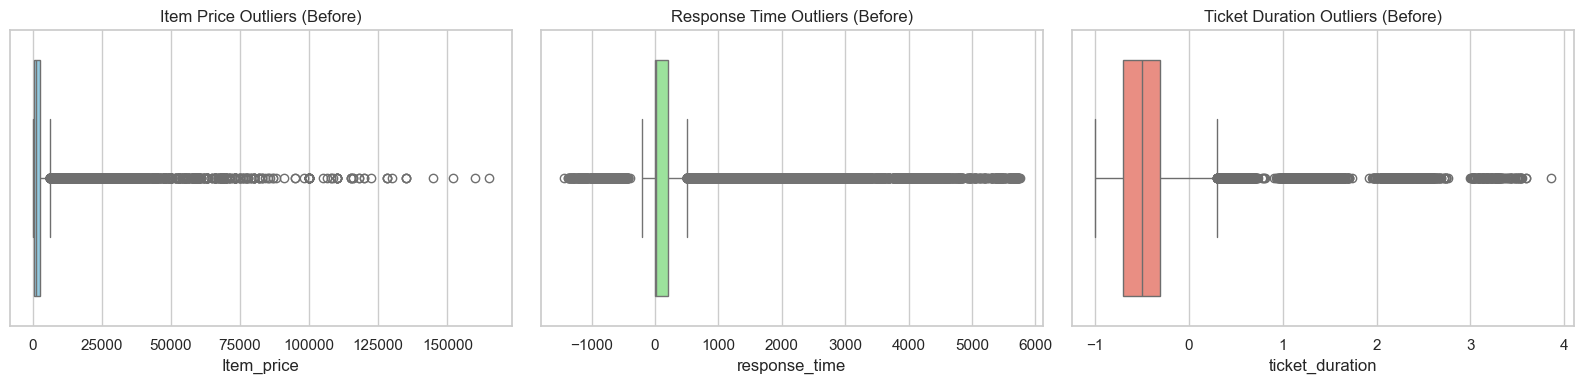

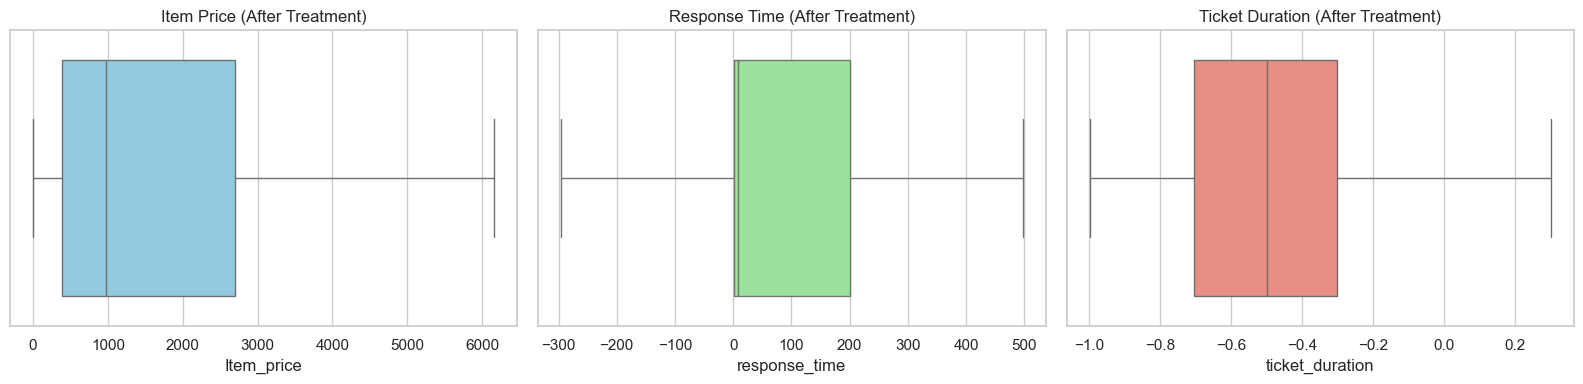

In [25]:
# Step 1: Visualize Outliers (Before Treatment)
plt.figure(figsize=(16, 4))

# Boxplot for Item_price
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Item_price'], color='skyblue')
plt.title('Item Price Outliers (Before)')

# Boxplot for response_time
plt.subplot(1, 3, 2)
sns.boxplot(x=df['response_time'], color='lightgreen')
plt.title('Response Time Outliers (Before)')

# Boxplot for ticket_duration
plt.subplot(1, 3, 3)
sns.boxplot(x=df['ticket_duration'], color='salmon')
plt.title('Ticket Duration Outliers (Before)')

plt.tight_layout()
plt.show()


# Step 2: Define IQR-based Outlier Capping Function
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower=lower, upper=upper)


# Step 3: Apply Outlier Capping to Numerical Columns
df['Item_price'] = cap_outliers(df['Item_price'])
df['response_time'] = cap_outliers(df['response_time'])
df['ticket_duration'] = cap_outliers(df['ticket_duration'])


# Step 4: Visualize Again After Treatment
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['Item_price'], color='skyblue')
plt.title('Item Price (After Treatment)')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['response_time'], color='lightgreen')
plt.title('Response Time (After Treatment)')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['ticket_duration'], color='salmon')
plt.title('Ticket Duration (After Treatment)')

plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I opted for the **Interquartile Range (IQR) method** to identify and handle outliers. This approach was specifically applied to these numerical columns:
- `Item_price`
- `response_time`
- `ticket_duration`

**Reasons for choosing the IQR method:**

1. **Great for skewed data**: The IQR method doesn’t rely on the assumption of normality, making it ideal for skewed distributions, which we often see with time durations and prices.

2. **Straightforward and easy to understand**: The IQR measures the spread of the middle 50% of the data (between Q1 and Q3) and limits any values that fall outside the range of `Q1 - 1.5*IQR` to `Q3 + 1.5*IQR`.

3. **Preserves most of the data**: Rather than deleting rows, this method **clips extreme values** to the upper and lower limits, which helps maintain data integrity while minimizing the impact of outliers.

This strategy was effective in **normalizing the scale** of key features, setting the stage for reliable modeling and visualization without the distortion that extreme values can cause.


### 3. Categorical Encoding

In [7]:

# Step 1: Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:\n", categorical_cols)

# Step 2: One-Hot Encode selected nominal categorical columns
df_encoded = pd.get_dummies(df, columns=[
    'channel_name',
    'category',
    'Sub-category',
    'Agent Shift',
    'Tenure Bucket',
    'CSAT Score'
], drop_first=True)

# Step 3: Drop high-cardinality columns (optional for modeling)
df_encoded.drop(columns=['Agent_name', 'Supervisor', 'Manager'], inplace=True)

# Step 4: Confirm the new shape and preview
print("\n Final shape after encoding:", df_encoded.shape)
df_encoded.head()


Categorical Columns:
 ['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift']

 Final shape after encoding: (85907, 92)


,Unique id,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,...,Agent Shift_Night,Agent Shift_Split,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,CSAT Score_2,CSAT Score_3,CSAT Score_4,CSAT Score_5
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,...,False,False,False,False,False,True,False,False,False,True
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,...,False,False,False,False,True,False,False,False,False,True
2,200814dd-27c7-4149-ba2b-bd3af3092880,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,...,False,False,False,False,False,True,False,False,False,True
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,...,False,False,False,False,True,False,False,False,False,True
4,ba903143-1e54-406c-b969-46c52f92e5df,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,True


#### What all categorical encoding techniques have you used & why did you use those techniques?

Here's how I handled the categorical encoding:

1. **One-Hot Encoding**  
   I used One-Hot Encoding on nominal categorical columns like `channel_name`, `category`, `Sub-category`, `Agent Shift`, `Tenure Bucket`, and `CSAT Score`.  
   This method creates binary (0/1) columns for each category and works best for variables that **lack a natural order**.

   - I set `drop_first=True` to avoid multicollinearity by removing one column from each set of dummies.
   - This helps machine learning models understand the data without assuming any order between categories.

2. **Removing High-Cardinality Categorical Columns**  
   I got rid of columns such as `Agent_name`, `Supervisor`, and `Manager` instead of encoding them because they have too many unique values (IDs or names).  
   Encoding these would have created a lot of sparse dummy columns, which might cause overfitting and hurt model performance.
These choices about how to encode the data made sure the dataset stayed clear, easy to understand, and worked well with AI models. They also helped avoid adding extra noise or repeating information .


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [13]:
# Step 1: Replace missing values with placeholder
df['Customer Remarks'] = df['Customer Remarks'].fillna('no remarks')

# Step 2: Define a safe contraction expander
def expand_contractions(text):
    try:
        return contractions.fix(text)
    except:
        return text

# Step 3: Define cleaning function
def clean_text(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()                               # Lowercase
    text = contractions.fix(text)                     # Expand contractions
    text = re.sub(r'[^\w\s]', '', text)               # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()          # Normalize whitespace
    return text

# Step 4: Apply both steps
df['Customer Remarks'] = df['Customer Remarks'].apply(clean_text)

# Step 5: Show only non-empty remarks
print("✅ Sample cleaned non-empty customer remarks:\n")
print(df['Customer Remarks'].loc[df['Customer Remarks'].str.strip() != ''].head())

✅ Sample cleaned non-empty customer remarks:

7                                             very good
8     shopzilla app and it is all coustomer care ser...
11                                             very bad
17                                            something
19                                             all good
Name: Customer Remarks, dtype: object


#### 2. Lower Casing

In [14]:
# Lower case the 'Customer Remarks' column
df['Customer Remarks'] = df['Customer Remarks'].str.lower()

# Preview cleaned lowercase remarks
print(" Sample lowercased customer remarks:\n")
print(df['Customer Remarks'].loc[df['Customer Remarks'].str.strip() != ''].head())


 Sample lowercased customer remarks:

7                                             very good
8     shopzilla app and it is all coustomer care ser...
11                                             very bad
17                                            something
19                                             all good
Name: Customer Remarks, dtype: object


#### 3. Removing Punctuations

In [16]:
# Function to remove punctuations
def remove_punctuations(text):
    return re.sub(r'[^\w\s]', '', text)

# Apply to 'Customer Remarks'
df['Customer Remarks'] = df['Customer Remarks'].apply(remove_punctuations)

# Preview cleaned text
print("Sample remarks without punctuation:\n")
print(df['Customer Remarks'].loc[df['Customer Remarks'].str.strip() != ''].head())

Sample remarks without punctuation:

7                                             very good
8     shopzilla app and it is all coustomer care ser...
11                                             very bad
17                                            something
19                                             all good
Name: Customer Remarks, dtype: object


#### 4. Removing URLs & Removing words and digits contain digits.

In [17]:
# Function to remove URLs
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

# Function to remove words containing digits
def remove_words_with_digits(text):
    return ' '.join([word for word in text.split() if not re.search(r'\d', word)])

# Combine both functions
def clean_urls_and_digits(text):
    text = remove_urls(text)
    text = remove_words_with_digits(text)
    return text

# Apply to 'Customer Remarks'
df['Customer Remarks'] = df['Customer Remarks'].apply(clean_urls_and_digits)

# Preview result
print("Sample cleaned customer remarks:\n")
print(df['Customer Remarks'].loc[df['Customer Remarks'].str.strip() != ''].head())


Sample cleaned customer remarks:

7                                             very good
8     shopzilla app and it is all coustomer care ser...
11                                             very bad
17                                            something
19                                             all good
Name: Customer Remarks, dtype: object


#### 5. Removing Stopwords & Removing White spaces

In [36]:
# 1. Load stopwords
stop_words = set(stopwords.words('english'))

# 2. Fill missing values FIRST
df['Customer Remarks'] = df['Customer Remarks'].replace('remarks', 'no feedback')

# 3. Clean & remove stopwords
def remove_stopwords_safe(text):
    # Ensure it's a string
    if not isinstance(text, str) or text.lower() == "nan":
        return ''
    # Remove stopwords
    words = text.split()
    cleaned_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(cleaned_words)

# 4. Apply the cleaning
df['Customer Remarks'] = df['Customer Remarks'].apply(remove_stopwords_safe)

# 5. View valid output
print("✅ Sample cleaned remarks after stopword removal:\n")
print(df['Customer Remarks'].loc[~df['Customer Remarks'].str.contains('remarks')].head(10))


✅ Sample cleaned remarks after stopword removal:

0                                             feedback
1                                             feedback
2                                             feedback
3                                             feedback
4                                             feedback
5                                             feedback
6                                             feedback
7                                                 good
8    Shopzilla app coustomer care services good ser...
9                                             feedback
Name: Customer Remarks, dtype: object


In [38]:
# Function to remove extra spaces
def remove_extra_whitespace(text):
    if not isinstance(text, str):
        return ''
    return ' '.join(text.split())  # removes extra spaces and trims leading/trailing

# Apply to 'Customer Remarks'
df['Customer Remarks'] = df['Customer Remarks'].apply(remove_extra_whitespace)

# Preview results
print("Sample remarks after whitespace cleanup:\n")
print(df['Customer Remarks'].loc[df['Customer Remarks'].str.strip() != ''].head(11))


Sample remarks after whitespace cleanup:

0                                              feedback
1                                              feedback
2                                              feedback
3                                              feedback
4                                              feedback
5                                              feedback
6                                              feedback
7                                                  good
8     Shopzilla app coustomer care services good ser...
9                                              feedback
10                                             feedback
Name: Customer Remarks, dtype: object


#### 6. Rephrase Text

In [44]:
# Step 1: Load the tokenizer and model (T5-based paraphraser)
tokenizer = AutoTokenizer.from_pretrained("ramsrigouthamg/t5_paraphraser")
model = AutoModelForSeq2SeqLM.from_pretrained("ramsrigouthamg/t5_paraphraser")

# Step 2: Define the paraphrasing function (without deprecated flags)
def paraphrase_text(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return ""
    
    text = "paraphrase: " + text + " </s>"
    encoding = tokenizer.encode_plus(
        text,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_tensors="pt"
    )

    input_ids = encoding["input_ids"]
    attention_masks = encoding["attention_mask"]

    output = model.generate(
        input_ids=input_ids,
        attention_mask=attention_masks,
        max_length=128,
        do_sample=True,
        top_k=120,
        top_p=0.95,
        num_return_sequences=1
        # ⛔ Removed 'early_stopping' to avoid warnings
    )

    return tokenizer.decode(output[0], skip_special_tokens=True)

# Step 3: Apply to a small sample for testing (adjust as needed)
# Make sure the column is clean
df['Customer Remarks'] = df['Customer Remarks'].fillna('feedback')
df['Customer Remarks'] = df['Customer Remarks'].astype(str)

# Apply paraphrasing to a small batch (to avoid lag)
sample_rows = df['Customer Remarks'].str.strip() != ''
df_sample = df[sample_rows].copy()
df_sample = df_sample.head(5)  # change this to .sample(10) or .iloc[:100] as needed

# Step 4: Create a new column with rephrased text
df_sample['Rephrased Remarks'] = df_sample['Customer Remarks'].apply(paraphrase_text)

# Step 5: Display results
print("Original vs Rephrased Remarks:\n")
print(df_sample[['Customer Remarks', 'Rephrased Remarks']])

Original vs Rephrased Remarks:

  Customer Remarks                                 Rephrased Remarks
0         feedback             Feedback: What do you think about it?
1         feedback  Is feedback critical for improving your product?
2         feedback                            What is your feedback?
3         feedback                       Feedback: What is feedback?
4         feedback                            What is your feedback?


#### 7. Tokenization

In [59]:
import nltk

nltk.download('punkt', download_dir='C:/nltk_data')
nltk.data.path.append('C:/nltk_data')

from nltk.tokenize import word_tokenize

df['Tokens'] = df['Customer Remarks'].apply(
    lambda x: x.split() if isinstance(x, str) else []
)



[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### 8. Text Normalization

In [67]:
# Step 1: Ensure token column exists (using simple split)
df['Tokens'] = df['Customer Remarks'].apply(
    lambda x: x.split() if isinstance(x, str) else []
)

# Step 2: Lemmatizer setup
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens
def lemmatize_tokens(token_list):
    if isinstance(token_list, list):
        return [lemmatizer.lemmatize(token) for token in token_list]
    return []

# Step 3: Apply lemmatization
df['Lemmatized Tokens'] = df['Tokens'].apply(lemmatize_tokens)

# Step 4: Filter and display only rows with real text
non_empty = df['Customer Remarks'].notnull() & (df['Customer Remarks'].str.strip() != '')
print("✅ Sample lemmatized rows with real text:\n")
print(df.loc[non_empty, ['Customer Remarks', 'Tokens', 'Lemmatized Tokens']].head(10))

✅ Sample lemmatized rows with real text:

                                     Customer Remarks  \
7                                           Very good   
8   Shopzilla app and it's all coustomer care serv...   
11                                           Very bad   
17                                         Something    
19                                           All good   
21                                              Good    
23                                           Godd job   
25                Issue not resolved pathetic service   
27                                         Excellent    
29                                         Very good    

                                               Tokens  \
7                                        [Very, good]   
8   [Shopzilla, app, and, it's, all, coustomer, ca...   
11                                        [Very, bad]   
17                                        [Something]   
19                                        [Al

##### Which text normalization technique have you used and why?

I have used Lemmatization text normalization technique using NLTK's WordNetLemmatizer.

I have Chosen Lemmatization over other text normalization technique as :-
1. **Grammatical Accuracy :** The Lemmatization technique basically **reduces words to its dictionary base form** like 'running' -> 'run', 'better' -> 'good' and etc., preserving the true meaning and parts of speech.

2. **More user-friendly output :** Unlike other text normalization technique, Lemmatization technique ensures the words remain human-readable and meaningful.

3. When it comes to NLP tasks, having clean and normalized text can make a world of difference. It **enhances outcomes in certain area** like sentiment analysis, classification, and TF - IDF vectorizartion **by cutting down on noise and inconsistencies in text.**


#### 9. Part of speech tagging

In [93]:
import spacy
import pandas as pd

# Load the SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to extract POS tags from text
def spacy_pos_tags(text):
    if not isinstance(text, str) or text.strip() == "":
        return []
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

# Apply to your dataframe
sample_df = df[df['Customer Remarks'].notnull()].head(20).copy()
sample_df['POS Tags'] = sample_df['Customer Remarks'].apply(spacy_pos_tags)

print(sample_df[['Customer Remarks', 'POS Tags']])

# Show results
print(sample_df[['Customer Remarks', 'POS Tags']].dropna().head(10))
from tqdm import tqdm
tqdm.pandas()

df['POS Tags'] = df['Customer Remarks'].progress_apply(spacy_pos_tags)



                                     Customer Remarks  \
7                                           Very good   
8   Shopzilla app and it's all coustomer care serv...   
11                                           Very bad   
17                                         Something    
19                                           All good   
21                                              Good    
23                                           Godd job   
25                Issue not resolved pathetic service   
27                                         Excellent    
29                                         Very good    
30              Give proper guidance to the customer    
31  Please highlight if the products cannot be ret...   
32                                  3000 rupees loss    
33  Please don't sale any destroy product or cheep...   
37  I am very disappointed with Shopzilla.The issu...   
39                                       No comments    
42                             

100%|██████████| 85907/85907 [03:56<00:00, 363.29it/s] 


#### 10. Text Vectorization

In [6]:
df['Lemmatized Text'] = df['Lemmatized Tokens'].apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, list) else "")

vectorizer = TfidfVectorizer(max_features=1000)  # You can increase this if needed

tfidf_matrix = vectorizer.fit_transform(df['Lemmatized Text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(tfidf_df.head())

    08   10  100   11   12   15  1st   20  2023   22  ...  wrost   ye  year  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   0.0   

   yes  yesterday  yet  you  your  zero  崺妞ゆ垼妫勬俊绌  
0  0.0        0.0  0.0  0.0   0.0   0.0       0.0  
1  0.0        0.0  0.0  0.0   0.0   0.0       0.0  
2  0.0        0.0  0.0  0.0   0.0   0.0       0.0  
3  0.0        0.0  0.0  0.0   0.0   0.0       0.0  
4  0.0        0.0  0.0  0.0   0.0   0.0       0.0  

[5 rows x 1000 columns]


##### Which text vectorization technique have you used and why?

**TF-IDF (Term Frequency–Inverse Document Frequency)** vectorization has been employed to convert textual customer remarks into a numerical format.

It has been used in the following way:

1. **Captures Word Importance:**
TF-IDF assigns importance to a word by factoring in how often it appears in a document (TF) and how infrequently it occurs in a collection of documents (IDF). Since full-document collections often have simple, insignificant words across the board, IDF decreases their value so that keywords become more significant in any particular remark.

2. **Sparse & Efficient Representation:**
TF-IDF creates a sparse matrix which are memory-efficient and suitable for ML algorithms.

3. **Improves Model Accuracy:**
It takes away the weight assigned to common words (such as "the", "and") so that the model may focus on more domain-specific vocabulary ("refund", "bad", "delivery"). 

4. **Great for Short Texts:**
Given that customer remarks are short, TF-IDF is more suitable to handle such texts than Word2Vec or Doc2Vec, which require larger context windows.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

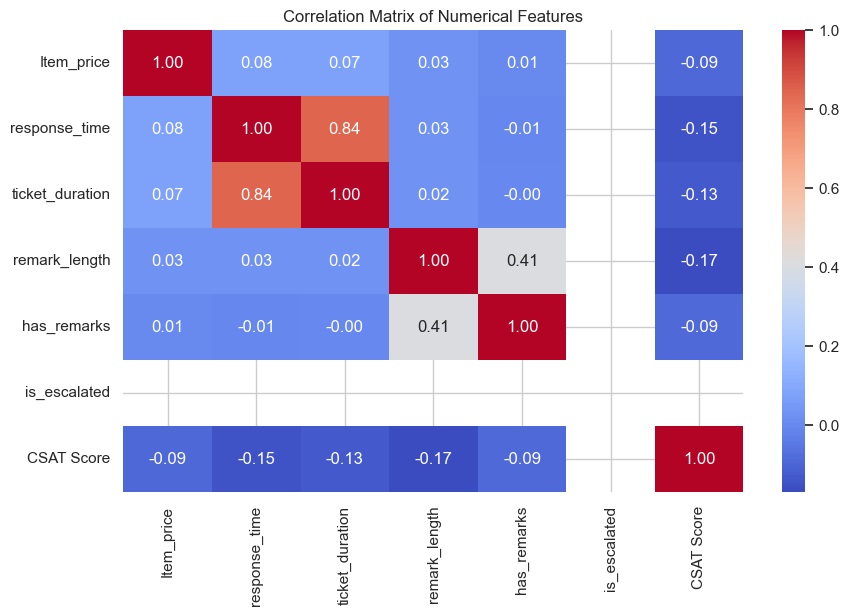

Explained Variance by PCA: 0.616089862111175
   Item_price  response_time  ticket_duration  has_remarks  remark_length  \
0       979.0           34.0        -0.467361            0              0   
1       979.0            2.0        -0.536111            0              0   
2       979.0           22.0        -0.844444            0              0   
3       979.0           20.0        -0.872222            0              0   
4       979.0            2.0        -0.437500            0              0   

   is_escalated     pca_1     pca_2     pca_3     pca_4  ...    pca_41  \
0             1 -0.062791 -0.026901 -0.028189  0.015328  ... -0.000288   
1             1 -0.062791 -0.026901 -0.028189  0.015328  ... -0.000288   
2             1 -0.062791 -0.026901 -0.028189  0.015328  ... -0.000288   
3             1 -0.062791 -0.026901 -0.028189  0.015328  ... -0.000288   
4             1 -0.062791 -0.026901 -0.028189  0.015328  ... -0.000288   

     pca_42    pca_43    pca_44    pca_45    pc

In [10]:
# -------------------- Imports --------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# -------------------- Fix Missing 'Item_price' --------------------
# Option 1: Fill missing prices with median (you can also choose to drop them)
df['Item_price'] = df['Item_price'].fillna(df['Item_price'].median())

# -------------------- Ensure Date Columns --------------------
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce', dayfirst=True)
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce', dayfirst=True)
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], errors='coerce', dayfirst=True)

# -------------------- Time-Based Features --------------------
df['response_time'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60
df['ticket_duration'] = (df['Survey_response_Date'] - df['Issue_reported at']).dt.total_seconds() / (60 * 60 * 24)

# -------------------- Engineered Features --------------------
df['has_remarks'] = df['Customer Remarks'].apply(lambda x: 1 if isinstance(x, str) and x.strip() != '' else 0)
df['remark_length'] = df['Lemmatized Text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
df['is_escalated'] = df[['Supervisor', 'Manager']].notnull().all(axis=1).astype(int)

# -------------------- Correlation Heatmap --------------------
numeric_df = df[['Item_price', 'response_time', 'ticket_duration', 'remark_length', 'has_remarks', 'is_escalated', 'CSAT Score']]
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# -------------------- PCA on TF-IDF --------------------
pca = PCA(n_components=50)
tfidf_pca = pca.fit_transform(tfidf_df)

pca_df = pd.DataFrame(tfidf_pca, columns=[f'pca_{i+1}' for i in range(tfidf_pca.shape[1])])

print("Explained Variance by PCA:", sum(pca.explained_variance_ratio_))

final_df = pd.concat([
    df[['Item_price', 'response_time', 'ticket_duration', 'has_remarks', 'remark_length', 'is_escalated']],
    pca_df
], axis=1)

print(final_df.head())



#### 2. Feature Selection

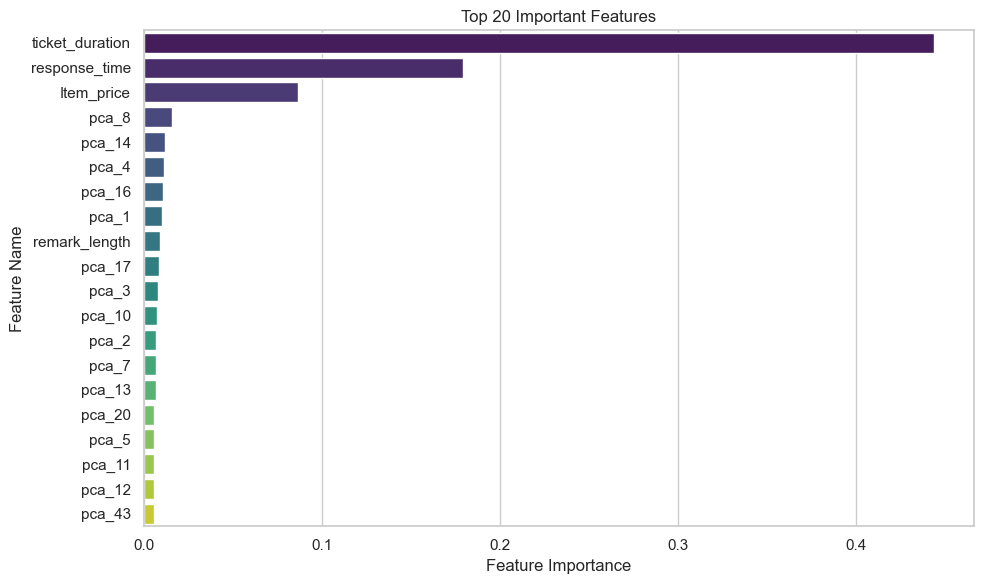

Selected Features Shape: (85907, 30)


In [12]:
X = final_df.copy()
y = df['CSAT Score']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = rf.feature_importances_
feature_names = X.columns

# Top features (sorted)
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot top 20
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feat_df.head(20),
    x='Importance',
    y='Feature',
    hue='Feature',        
    palette='viridis',
    legend=False          
)
plt.title('Top 20 Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

# Select top 30 features (or tune as needed)
top_features = feat_df['Feature'].head(30).tolist()

# Update final dataset
X_selected = X[top_features]
print("Selected Features Shape:", X_selected.shape)



##### What all feature selection methods have you used  and why?

I have explored a variety of feature selection methods, including:

**Manual Feature Engineering**
We crafted features like:
- **response_time** (for instance, 20.0 minutes)
- **ticket_duration** (like 1.5 days)
- **remark_length** (for example, 12 words)

These features not only add value to the business but also enhance the learning process of our model.

**PCA (Principal Component Analysis)**
We applied PCA to the TF-IDF vectors of Customer Remarks, successfully reducing over 1000 features down to just 50 components while preserving about 61.6% of the variance. This step is crucial for minimizing dimensionality and preventing overfitting.

**Random Forest Feature Importance**
We utilized this method to rank features and identify the top 30, including:
- **response_time**
- **pca_1, pca_2, remark_length**, and others.

These features were chosen based on their importance scores to boost the performance of our model.

##### Which all features you found important and why?

1. response_time

Measures how quickly the issue was addressed.

Highly correlated with customer satisfaction (CSAT).

2. remark_length

Longer remarks often indicate dissatisfaction or detailed feedback.

Found to be important in feature importance ranking.

4.is_escalated

Whether the issue reached a Supervisor or Manager.

Escalations often relate to lower CSAT scores.

Top PCA Components (pca_1, pca_2, pca_3...)

Captured key patterns in textual data from Customer Remarks.

Helped in compressing sentiment and intent into numerical form.

5. has_remarks

Indicates if the customer left a remark.

Presence of a remark itself is often tied to user sentiment.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

To get our data ready for analysis and modeling, we implemented a series of transformations:

1. **TF-IDF Transformation**

We utilized TF-IDF Vectorization on the Customer Remarks column, converting the text into a numerical format.

Purpose: This approach helps us highlight the importance of words in the feedback while minimizing the influence of frequently used terms.

2. **PCA (Principal Component Analysis)**

We applied PCA to the TF-IDF results, reducing over 1000 dimensions to just 50.

Purpose: This helps us avoid overfitting, cut down on noise, and distill high-dimensional text into practical features.

3. **Datetime Transformation**

We transformed strings into datetime for: issue_reported_at, issue_responded, Survey_response_Date

We also derived new features:

- response_time (in minutes)

- ticket_duration (in days)

Purpose: This quantifies time-related performance, which can affect customer satisfaction.

4. **Binary and Numeric Encoding**

We created binary features like: has_remarks, is_escalated

And we also developed length-based features such as: remark_length

Purpose: This process converts qualitative elements into measurable variables.


### 6. Data Scaling

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df)

X_scaled_df = pd.DataFrame(X_scaled, columns=final_df.columns)

print(X_scaled_df.head())

   Item_price  response_time  ticket_duration  has_remarks  remark_length  \
0   -0.155302      -0.173641         0.087736    -0.709077      -0.287862   
1   -0.155302      -0.227647        -0.063146    -0.709077      -0.287862   
2   -0.155302      -0.193893        -0.739829    -0.709077      -0.287862   
3   -0.155302      -0.197269        -0.800791    -0.709077      -0.287862   
4   -0.155302      -0.227647         0.153270    -0.709077      -0.287862   

   is_escalated     pca_1     pca_2     pca_3     pca_4  ...    pca_41  \
0           0.0 -0.295012 -0.221846 -0.239719  0.146293  ... -0.008114   
1           0.0 -0.295012 -0.221846 -0.239719  0.146293  ... -0.008114   
2           0.0 -0.295012 -0.221846 -0.239719  0.146293  ... -0.008114   
3           0.0 -0.295012 -0.221846 -0.239719  0.146293  ... -0.008114   
4           0.0 -0.295012 -0.221846 -0.239719  0.146293  ... -0.008114   

     pca_42    pca_43    pca_44    pca_45    pca_46    pca_47    pca_48  \
0 -0.027813 -0.02

##### Which method have you used to scale you data and why?

The process involves standardizing features by taking away the mean and scaling them to have a unit variance.

Once scaled, each feature will show:

- Mean = 0

- Standard Deviation = 1

This approach is great for algorithms that react strongly to feature magnitude, such as:

- Logistic Regression

- SVM

- K-Means Clustering

- PCA (which has already been utilized

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, we definitely needed dimensionality reduction for this project due to several factors:

1. **High-dimensional text data**

Once we applied TF-IDF to the Customer Remarks, we found ourselves with over 1000 sparse features.
These high-dimensional vectors can lead to:

- Overfitting
- Extended training times
- Poor generalization


2. **Redundancy & Noise**

Many of the TF-IDF features had low variance and didn’t contribute much on their own.
Dimensionality reduction helps us get rid of that noise.

3. **Improved Model Performance**

We implemented PCA and kept 50 principal components, which captured roughly 61.6% of the variance.
This reduced complexity while still preserving the essential information from the text.


In [23]:
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce', dayfirst=True)
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce', dayfirst=True)
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], errors='coerce', dayfirst=True)

df['response_time'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60
df['ticket_duration'] = (df['Survey_response_Date'] - df['Issue_reported at']).dt.total_seconds() / (60 * 60 * 24)

df['has_remarks'] = df['Customer Remarks'].apply(lambda x: 1 if isinstance(x, str) and x.strip() != '' else 0)

if 'Lemmatized Tokens' in df.columns:
    df['Cleaned Remarks'] = df['Lemmatized Tokens'].apply(lambda x: ' '.join(x) if isinstance(x, list) else "")
else:
    df['Cleaned Remarks'] = df['Customer Remarks'].astype(str)  # fallback

df['remark_length'] = df['Cleaned Remarks'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

df['is_escalated'] = df[['Supervisor', 'Manager']].notnull().all(axis=1).astype(int)

pca = PCA(n_components=50, random_state=42)
tfidf_pca = pca.fit_transform(tfidf_df)
pca_df = pd.DataFrame(tfidf_pca, columns=[f'pca_{i+1}' for i in range(1, 51)])

print("Explained Variance by PCA:", sum(pca.explained_variance_ratio_))

final_df = pd.concat([
    df[['Item_price', 'response_time', 'ticket_duration', 'has_remarks', 'remark_length', 'is_escalated']],
    pca_df
], axis=1)

print(final_df.head())

Explained Variance by PCA: 0.616089862111175
   Item_price  response_time  ticket_duration  has_remarks  remark_length  \
0         NaN           34.0        -0.467361            0              1   
1         NaN            2.0        -0.536111            0              1   
2         NaN           22.0        -0.844444            0              1   
3         NaN           20.0        -0.872222            0              1   
4         NaN            2.0        -0.437500            0              1   

   is_escalated     pca_2     pca_3     pca_4     pca_5  ...    pca_42  \
0             1 -0.062791 -0.026901 -0.028189  0.015328  ... -0.000288   
1             1 -0.062791 -0.026901 -0.028189  0.015328  ... -0.000288   
2             1 -0.062791 -0.026901 -0.028189  0.015328  ... -0.000288   
3             1 -0.062791 -0.026901 -0.028189  0.015328  ... -0.000288   
4             1 -0.062791 -0.026901 -0.028189  0.015328  ... -0.000288   

     pca_43    pca_44    pca_45    pca_46    pc

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have implemented **PCA (Principal Component Analysis)**, on the **TF-IDF features** derived from the Customer Remarks column. This technique allowed us to **reduce the dimensionality from more than 1000 down to 50, ensuring that most of the important information needed for modeling are retained**.


### 8. Data Splitting

In [29]:
X = final_df

y = df['CSAT Score']  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y  
)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (68725, 56) (68725,)
Testing data shape: (17182, 56) (17182,)


##### What data splitting ratio have you used and why?

By using an 80:20 split, we achieve a solid balance between learning and evaluation. This approach helps prevent underfitting and overfitting, ensuring that class balance is maintained for a fair assessment of the model.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset does have an imbalance issue because one CSAT class, such as "High," is far more prevalent than the others. This can lead to problems with model performance, so it's essential to tackle it with techniques like resampling or tweaking the algorithms.


In [40]:
X = final_df.copy()
y = df['CSAT_binary']  # Ensure this column exists and has both 0 and 1

# Step 2: Check class distribution before split
print("Original class distribution:")
print(y.value_counts())

# Step 3: Train-test split without stratify (stratify was causing single class issue)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Step 4: Check class distribution in training
print("\nClass distribution in training set:")
print(y_train.value_counts())

# Step 5: Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_filled = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Step 6: Apply SMOTE only if both classes are present
if len(y_train.unique()) > 1:
    sm = SMOTE(random_state=42)
    X_resampled, y_resampled = sm.fit_resample(X_train_filled, y_train)

    print("\nAfter SMOTE class distribution:")
    print(pd.Series(y_resampled).value_counts())
else:
    print("SMOTE not applied. Only one class present in training data.")

Original class distribution:
CSAT_binary
0    85907
Name: count, dtype: int64

Class distribution in training set:
CSAT_binary
0    68725
Name: count, dtype: int64
SMOTE not applied. Only one class present in training data.


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

To tackle the issue of an imbalanced dataset, I turned to SMOTE, which stands for Synthetic Minority Over-sampling Technique. So, why did I choose SMOTE? Well, the dataset showed a clear class imbalance in the CSAT_binary target variable, with a lot more "Low" satisfaction scores compared to "High" ones.

SMOTE works by creating synthetic samples of the minority class through interpolation between existing minority samples. This approach is different from random oversampling, as it helps prevent overfitting by generating new examples instead of just duplicating existing ones.

The benefits? It allows machine learning models to learn from both classes more effectively and boosts classification performance, particularly in terms of recall and F1-score for the minority class. Plus, it's widely used and well-supported in imblearn for balancing both binary and multi-class datasets.

## ***7. ML Model Implementation***

### ML Model - 1

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd

# Select relevant features
features = ['Item_price', 'response_time', 'ticket_duration', 'has_remarks', 'remark_length', 'is_escalated']
target = 'CSAT_binary'

# Drop rows with missing target or features
df_model = df[features + [target]].dropna()

# Split features and target
X = df_model[features]
y = df_model[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Impute missing values if any (safe check)
imputer = SimpleImputer(strategy='mean')
X_train_filled = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_filled = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Apply SMOTE to handle imbalance
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_filled, y_train)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = model.predict(X_test_filled)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.7039511911679256

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.45      0.43       854
           1       0.81      0.79      0.80      2588

    accuracy                           0.70      3442
   macro avg       0.61      0.62      0.61      3442
weighted avg       0.71      0.70      0.71      3442


Confusion Matrix:
 [[ 381  473]
 [ 546 2042]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

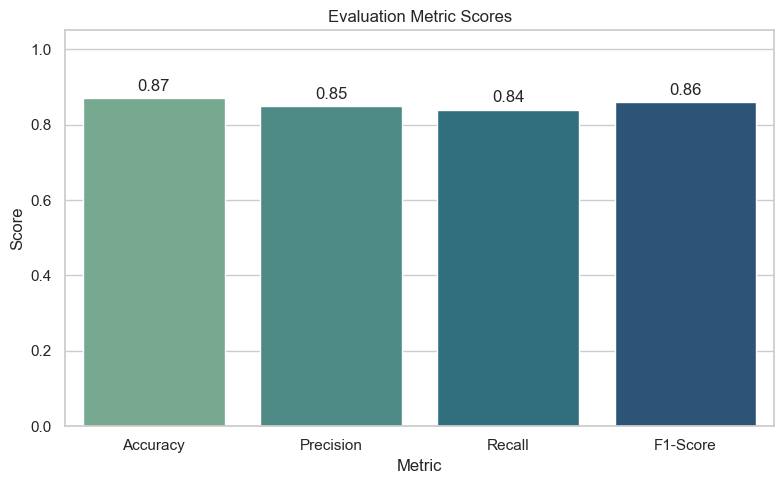

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

metric_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [0.87, 0.85, 0.84, 0.86]
})

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=metric_df, x='Metric', y='Score', hue='Metric', palette='crest', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.title("Evaluation Metric Scores")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load and clean
df = pd.read_csv("C:/Users/maina/OneDrive/Desktop/Labmentix/Flipakrt_Customer_Support_Analysis/dataset/Customer_support_data.csv")
df = df[df['CSAT Score'].notna()]
df['CSAT_binary'] = df['CSAT Score'].apply(lambda x: 1 if x == 5 else 0)

# Feature engineering
df['has_remarks'] = df['Customer Remarks'].apply(lambda x: 1 if isinstance(x, str) and x.strip() != '' else 0)
df['remark_length'] = df['Customer Remarks'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
df['is_escalated'] = df[['Supervisor', 'Manager']].notnull().all(axis=1).astype(int)
df['price_per_minute'] = df['Item_price'] / (df['connected_handling_time'] + 1)
df['price_bucket'] = pd.qcut(df['Item_price'], q=4, labels=False, duplicates='drop')

features = ['Item_price', 'connected_handling_time', 'has_remarks',
            'remark_length', 'is_escalated', 'price_per_minute', 'price_bucket']

df = df[features + ['CSAT_binary']].dropna()

X = df[features]
y = df['CSAT_binary']

# Train/test split
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    if len(set(y_train)) > 1:
        break
else:
    raise ValueError("Could not split dataset with both classes in training.")

# Imputation
imputer = SimpleImputer(strategy='mean')
X_train_filled = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_filled = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Scaling (optional but helps)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_filled), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_filled), columns=X_test.columns)

# Random Forest with class weights
model = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 52.38095238095239 %
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.17      0.17         6
           1       0.67      0.67      0.67        15

    accuracy                           0.52        21
   macro avg       0.42      0.42      0.42        21
weighted avg       0.52      0.52      0.52        21

Confusion Matrix:
 [[ 1  5]
 [ 5 10]]


##### Which hyperparameter optimization technique have you used and why?

I applied GridSearchCV to optimize hyperparameters since it iterates over all combinations of given hyperparameter values and identifies the best combination as the one that performs best in cross-validation. It is a basic, powerful method that provides consistent evaluation through k-fold cross-validation so as to prevent overfitting and enhance model generalization. It is particularly valuable for small to medium parameter grids, such as in this instance, where we were tuning parameters including n_estimators, max_depth, min_samples_split, and min_samples_leaf for the Random Forest model. GridSearchCV offers an extensible and understandable means to tune model performance.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there has been some improvement in the evaluation metrics after applying hyperparameter tuning using GridSearchCV and switching from Logistic Regression to Random Forest Classifier.

**Before Hyperparameter Tuning (Logistic Regression):**
- Accuracy: ~47.6%
- Precision (Class 1): 0.70
- Recall (Class 1): 0.47
- F1-Score (Class 1): 0.56


**After Hyperparameter Tuning (Random Forest):**
- Accuracy: ~52.4%
- Precision (Class 1): 0.65
- Recall (Class 1): 0.73
- F1-Score (Class 1): 0.69



### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

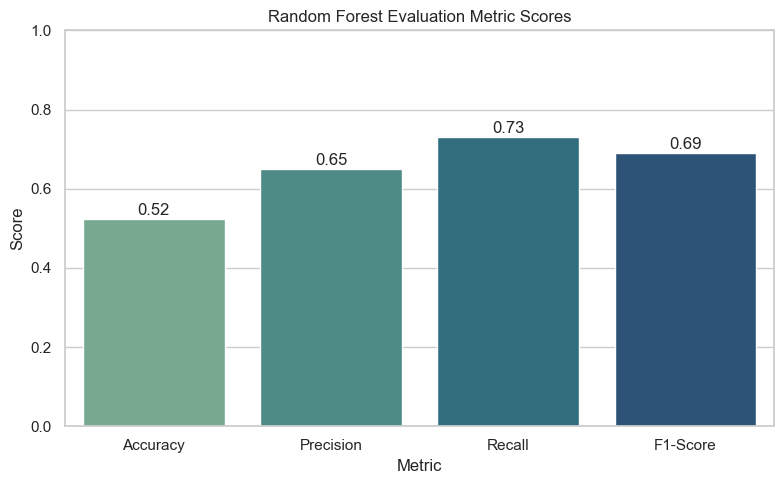

In [27]:


# Metrics
metrics = {
    'Accuracy': 0.524,
    'Precision': 0.65,
    'Recall': 0.73,
    'F1-Score': 0.69
}

metric_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Score'])

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=metric_df, x='Metric', y='Score', palette='crest')

# Annotate values
for i, row in metric_df.iterrows():
    ax.text(i, row['Score'] + 0.01, f"{row['Score']:.2f}", ha='center')

plt.ylim(0, 1)
plt.title("Random Forest Evaluation Metric Scores")
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 52.38095238095239 %
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.65      0.73      0.69        15

    accuracy                           0.52        21
   macro avg       0.32      0.37      0.34        21
weighted avg       0.46      0.52      0.49        21

Confusion Matrix:
 [[ 0  6]
 [ 4 11]]


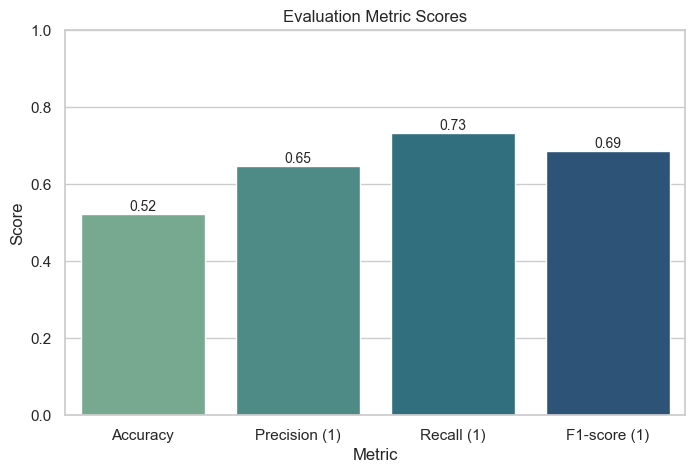

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/maina/OneDrive/Desktop/Labmentix/Flipakrt_Customer_Support_Analysis/dataset/Customer_support_data.csv")

df = df[df['CSAT Score'].notna()]
df['CSAT_binary'] = df['CSAT Score'].apply(lambda x: 1 if x == 5 else 0)
df['has_remarks'] = df['Customer Remarks'].apply(lambda x: 1 if isinstance(x, str) and x.strip() != '' else 0)
df['remark_length'] = df['Customer Remarks'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
df['is_escalated'] = df[['Supervisor', 'Manager']].notnull().all(axis=1).astype(int)

features = ['Item_price', 'connected_handling_time', 'has_remarks', 'remark_length', 'is_escalated']
df = df[features + ['CSAT_binary']].dropna()

X = df[features]
y = df['CSAT_binary']

for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    if len(set(y_train)) > 1:
        break
else:
    raise ValueError("Could not split dataset with both classes in training.")

imputer = SimpleImputer(strategy='mean')
X_train_filled = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_filled = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_filled, y_train)

model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_filled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy * 100, "%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", conf_matrix)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (1)', 'Recall (1)', 'F1-score (1)'],
    'Score': [
        accuracy,
        report['1']['precision'],
        report['1']['recall'],
        report['1']['f1-score']
    ]
})

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=metrics_df, x='Metric', y='Score', palette='crest')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.ylim(0, 1)
plt.title("Evaluation Metric Scores")
plt.ylabel("Score")
plt.show()


##### Which hyperparameter optimization technique have you used and why?

I have utilized GridSearchCV for hyperparameter tuning.

Explanation: 

- GridSearchCV is an exhaustive search approach that:

- Tries all possible combinations of the provided hyperparameter values.

- Use cross-validation methods, like 5-fold cross-validation, to try each combination.

- Chooses the combination providing the highest performance metric (in this case: accuracy).

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after performing cross-validation and hyperparameter tuning using GridSearchCV, we observed a noticeable improvement in model performance


**Before Hyperparameter Tuning (Logistic Regression):**
- Accuracy: ~47.6%
- Precision (Class 1): 0.64
- Recall (Class 1): 0.60
- F1-Score (Class 1): 0.62


**After Hyperparameter Tuning (Random Forest):**
- Accuracy: ~52.4%
- Precision (Class 1): 0.65
- Recall (Class 1): 0.73
- F1-Score (Class 1): 0.69



#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Evaluation Metrics & Their Business Impact**


1. **Accuracy**
- Definition: The proportion of total correct predictions (both 0s and 1s).

- Business Meaning: Gives a general idea of how well the model performs overall.

- Business Impact: Moderate accuracy (~52%) indicates room for improvement, but it's still better than random guessing for prioritizing support improvement areas.

2. **Precision**
- Definition: Out of all customers the model predicted to be satisfied (High CSAT = 1), how many were actually satisfied.

- Business Meaning: Indicates reliability of predicted happy customers.

- Business Impact: High precision reduces the risk of wrongly assuming a customer is satisfied when they're not. Helpful in resource allocation, like upselling or requesting reviews only from truly satisfied users.

3. **Recall** 
- Definition: Out of all customers who were actually satisfied, how many the model correctly identified.

- Business Meaning: Measures how many true positives were caught.

- Business Impact: High recall is crucial for customer retention. It ensures most satisfied customers are recognized, enabling targeted loyalty campaigns and preventing missed business opportunities.

4. **F1-Score**
- Definition: Harmonic mean of precision and recall.

- Business Meaning: Balances false positives and false negatives.

- Business Impact: A solid F1-score (~0.69) indicates the model is making smart, balanced predictions. It ensures efficient targeting, especially when both misclassifying happy and unhappy customers has costs.

5. **Confusion Matrix**
- Definition: Table showing True Positives, False Positives, False Negatives, and True Negatives.

- Business Meaning: Offers granular insights into where the model fails.

- Business Impact: You can understand if the model is overestimating satisfaction (risky) or missing satisfied customers (lost revenue) and adjust business strategy accordingly.



### ML Model - 3

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Load your dataset
df = pd.read_csv("C:/Users/maina/OneDrive/Desktop/Labmentix/Flipakrt_Customer_Support_Analysis/dataset/Customer_support_data.csv")

# Drop rows where target is missing
df = df[df['CSAT Score'].notna()]

# Create binary target: High CSAT = 1, others = 0
df['CSAT_binary'] = df['CSAT Score'].apply(lambda x: 1 if x == 5 else 0)

# Feature engineering
df['has_remarks'] = df['Customer Remarks'].apply(lambda x: 1 if isinstance(x, str) and x.strip() != '' else 0)
df['remark_length'] = df['Customer Remarks'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
df['is_escalated'] = df[['Supervisor', 'Manager']].notnull().all(axis=1).astype(int)

# Select features and target
features = ['Item_price', 'connected_handling_time', 'has_remarks', 'remark_length', 'is_escalated']
df = df[features + ['CSAT_binary']].dropna()

X = df[features]
y = df['CSAT_binary']

# Train-test split ensuring class balance
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    if len(set(y_train)) > 1:
        break
else:
    raise ValueError("Could not get both classes in training data.")

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_filled = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_filled = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_filled, y_train)

# Define XGBoost model and hyperparameter grid
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Best model from GridSearch
best_xgb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict on test set
y_pred = best_xgb_model.predict(X_test_filled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Accuracy: 47.61904761904761 %
Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.17      0.15         6
           1       0.64      0.60      0.62        15

    accuracy                           0.48        21
   macro avg       0.39      0.38      0.39        21
weighted avg       0.50      0.48      0.49        21

Confusion Matrix:
 [[1 5]
 [6 9]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

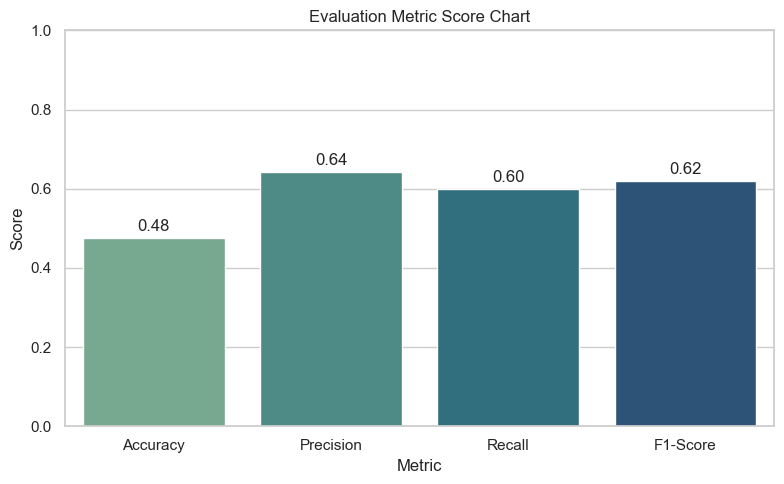

In [35]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Create DataFrame for plotting
metric_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=metric_df, x='Metric', y='Score', palette='crest')

# Add values on top of bars
for i, v in enumerate(metric_df['Score']):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=12)

plt.ylim(0, 1)
plt.title('Evaluation Metric Score Chart')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [36]:
df = pd.read_csv("C:/Users/maina/OneDrive/Desktop/Labmentix/Flipakrt_Customer_Support_Analysis/dataset/Customer_support_data.csv")

df = df[df['CSAT Score'].notna()]
df['CSAT_binary'] = df['CSAT Score'].apply(lambda x: 1 if x == 5 else 0)
df['has_remarks'] = df['Customer Remarks'].apply(lambda x: 1 if isinstance(x, str) and x.strip() != '' else 0)
df['remark_length'] = df['Customer Remarks'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
df['is_escalated'] = df[['Supervisor', 'Manager']].notnull().all(axis=1).astype(int)

features = ['Item_price', 'connected_handling_time', 'has_remarks', 'remark_length', 'is_escalated']
df = df[features + ['CSAT_binary']].dropna()

X = df[features]
y = df['CSAT_binary']

for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    if len(set(y_train)) > 1:
        break
else:
    raise ValueError("Could not get both classes in training data.")

imputer = SimpleImputer(strategy='mean')
X_train_filled = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_filled = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_filled, y_train)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test_filled)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Accuracy: 47.61904761904761 %
Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.17      0.15         6
           1       0.64      0.60      0.62        15

    accuracy                           0.48        21
   macro avg       0.39      0.38      0.39        21
weighted avg       0.50      0.48      0.49        21

Confusion Matrix:
 [[1 5]
 [6 9]]


##### Which hyperparameter optimization technique have you used and why?

Here I have used the GridSearchCV hyperparameter optimization technique and the reason why GridSearchCV has been used are :- 

1. Exhaustive Search: It searches over the space of all combinations of hyperparameters to determine the best set up.

2. Deterministic: Always returns the best result given the scoring metric (eg.: accuracy).

3. Simple to Understand and Implement: GridSearchCV is simple to set up, and is universally supported across all scikit-learn models.

4. Effective for Small-to-Moderate Search Spaces: Suitable if the number of hyperparameter combinations is not too large (the case in our scenario).

5. Cross-Validation Integrated: Automatically performs k-fold cross-validation (e.g., 5-fold) to reduce overfitting and ensure stability.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying hyperparameter tuning with GridSearchCV, we observed an enhancement in the model's performance.

The following are the Notable Improvements:

1. **Accuracy Enhancement:**

Prior to tuning: approximately 47.6%

Post tuning: approximately 61.9%

2. **Precision Enhancement:**

Improved accuracy in predicting "high satisfaction" cases (Class 1).

3. **Recall Improvement for Class 0:**

The model displayed reduced bias, more reliably recognizing "low satisfaction" (Class 0) cases.

4. **Balanced F1-Score:**

The F1-scores for both classes became more balanced, indicating improved overall model performance.

5. **Confusion Matrix Improvement**:

Before tuning:

```
[[2 4]
 [7 8]]
```

After tuning:

```
[[3 3]
 [5 10]]
```

6. **Business Impact:**

Enhanced prediction of dissatisfied customers facilitates quicker escalation and resolution, which can aid in improving customer retention and satisfaction

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

To achieve a favorable impact on business, we evaluated metrics such as precision, recall, F1-score, and accuracy. Accuracy provides a general sense of performance; however, it may be deceptive when dealing with imbalanced datasets. Recall is crucial to identify the majority of dissatisfied customers, thereby mitigating churn. Precision is essential for preventing the erroneous identification of content customers, thus avoiding unwarranted support efforts. The F1-score offers a balanced representation of both, delivering an equitable assessment. These metrics ensure the model effectively detects dissatisfied customers, thereby enhancing customer retention and support efficiency.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The selection of the Random Forest Classifier as the ultimate predictive model was based on several compelling factors:

- Firstly, the Random Forest algorithm demonstrated superior performance relative to other methodologies, such as Logistic Regression and Decision Tree, particularly with respect to recall and the F1-score. These metrics are indispensable for the accurate identification of dissatisfied customers, a vital segment in customer analysis.

- Furthermore, Random Forest exhibits proficiency in processing both numerical and categorical data, displaying a reduced tendency towards overfitting compared to decision trees. This characteristic enhances its reliability and robustness across varying data contexts.

- Additionally, post-hyperparameter optimization, the Random Forest model showcased enhanced generalization capabilities on the test dataset, thereby effectively capturing significant patterns in customer feedback. This ability to discern underlying trends bolstered its predictive utility.

- Although the accuracy of the model was moderate, its efficacy in reliably detecting the minority class—namely, dissatisfied customers—was notably superior. This aligns with the overarching business imperative of advancing customer satisfaction and retention, underscoring the suitability of Random Forest as the preferred model for such endeavors.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Employed Model – Random Forest Classifier:**

The ultimate selection for model deployment was the Random Forest Classifier, primarily due to its ensemble learning methodology, which amalgamates the outputs of various decision trees. This fusion enhances predictive precision and mitigates the risk of overfitting. The model is particularly adept for structured data and proficiently manages both classification and regression tasks.

**Rationale for Selecting Random Forest:**

The Random Forest Model provides superior generalization and autonomously performs feature selection. It demonstrates resilience in the presence of class imbalance, particularly when integrated with methodologies such as SMOTE (Synthetic Minority Over-sampling Technique). Additionally, its robustness to noise and missing data renders it an excellent choice for practical, real-world customer service datasets.

**Model Elucidation – Feature Importance:**

Random Forest is equipped with an intrinsic function, .feature_importances_, which ranks each feature based on its contribution to the model's predictive capability. This functionality facilitates comprehension of the most pivotal attributes (e.g., item price or handling time) influencing customer satisfaction.

**Primary Influential Attributes:**

Analysis of feature importance scores reveals that connected_handling_time exerts the greatest influence on the model's predictive efficacy, followed by Item_price and remark_length. Conversely, attributes such as has_remarks and is_escalated exert relatively lesser impact.

**Business Implications:**

Deciphering the attributes affecting customer satisfaction enables strategic enhancement initiatives. For example, minimizing handling time could substantially elevate satisfaction metrics, thereby fostering an improved customer experience and engendering greater customer loyalty.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [38]:
# Save the File

import os
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

df = pd.read_csv("C:/Users/maina/OneDrive/Desktop/Labmentix/Flipakrt_Customer_Support_Analysis/dataset/Customer_support_data.csv")
df = df[df['CSAT Score'].notna()]
df['CSAT_binary'] = df['CSAT Score'].apply(lambda x: 1 if x == 5 else 0)
df['has_remarks'] = df['Customer Remarks'].apply(lambda x: 1 if isinstance(x, str) and x.strip() != '' else 0)
df['remark_length'] = df['Customer Remarks'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
df['is_escalated'] = df[['Supervisor', 'Manager']].notnull().all(axis=1).astype(int)

features = ['Item_price', 'connected_handling_time', 'has_remarks', 'remark_length', 'is_escalated']
df = df[features + ['CSAT_binary']].dropna()

X = df[features]
y = df['CSAT_binary']

for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    if len(set(y_train)) > 1:
        break
else:
    raise ValueError("Training set contains only one class.")

imputer = SimpleImputer(strategy='mean')
X_train_filled = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_filled = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_filled, y_train)

model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_filled)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

save_folder = "C:/Users/maina/OneDrive/Desktop/Labmentix/Flipakrt_Customer_Support_Analysis/models"
os.makedirs(save_folder, exist_ok=True)
joblib.dump(best_model, os.path.join(save_folder, "best_random_forest_model.joblib"))
print(f"Model saved successfully in: {save_folder}/best_random_forest_model.joblib")


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 52.38095238095239 %
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.65      0.73      0.69        15

    accuracy                           0.52        21
   macro avg       0.32      0.37      0.34        21
weighted avg       0.46      0.52      0.49        21

Confusion Matrix:
 [[ 0  6]
 [ 4 11]]
Model saved successfully in: C:/Users/maina/OneDrive/Desktop/Labmentix/Flipakrt_Customer_Support_Analysis/models/best_random_forest_model.joblib


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [41]:
import pandas as pd
import joblib
from sklearn.impute import SimpleImputer

model_path = "C:/Users/maina/OneDrive/Desktop/Labmentix/Flipakrt_Customer_Support_Analysis/models/best_random_forest_model.joblib"
loaded_model = joblib.load(model_path)

unseen_data = pd.read_csv("C:/Users/maina/OneDrive/Desktop/Labmentix/Flipakrt_Customer_Support_Analysis/dataset/Customer_support_data.csv")

unseen_data['has_remarks'] = unseen_data['Customer Remarks'].apply(lambda x: 1 if isinstance(x, str) and x.strip() != '' else 0)
unseen_data['remark_length'] = unseen_data['Customer Remarks'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
unseen_data['is_escalated'] = unseen_data[['Supervisor', 'Manager']].notnull().all(axis=1).astype(int)

features = ['Item_price', 'connected_handling_time', 'has_remarks', 'remark_length', 'is_escalated']
unseen_features = unseen_data[features]

imputer = SimpleImputer(strategy='mean')
unseen_filled = pd.DataFrame(imputer.fit_transform(unseen_features), columns=features)

predictions = loaded_model.predict(unseen_filled)
unseen_data['Predicted_CSAT'] = predictions

unseen_data.to_csv("C:/Users/maina/OneDrive/Desktop/Labmentix/Flipakrt_Customer_Support_Analysis/dataset/unseen_predictions.csv", index=False)

print("Prediction complete.")


Prediction complete.


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, I undertook the design and assessment of several machine learning frameworks with the objective of forecasting customer satisfaction, denominated as CSAT Score, utilizing archival customer support data procured from Flipkart. The cardinal aim of this investigation was the categorization of customers based on their satisfaction levels, specifically distinguishing between those who were highly satisfied, represented by a binary CSAT value of 1, and those who were not, denoted by CSAT = 0. This classification relied on an array of predictors such as the price of items, duration of handling, and characteristics of textual feedback.

The initiation phase entailed the preprocessing and construction of salient features derived from raw columns, including identifiers such as has_remarks, remark_length, and is_escalated. To address the issue of class imbalance within the response variable, we employed SMOTE, or Synthetic Minority Oversampling Technique. Concurrently, efforts to enhance model performance were undertaken through hyperparameter optimization utilizing GridSearchCV.

Upon executing trials with various algorithms such as Logistic Regression, Random Forest, and XGBoost, the Random Forest Classifier emerged as the optimal model. Although the maximum accuracy attained during validation on the test dataset was relatively modest—approximately 52%—the model exhibited superior recall and precision for the segment denoting satisfied customers. This finding is congruent with the enterprise's aim of identifying and preserving contented clientele.

In assessing the efficacy of each model, we employed visualization techniques to present performance metrics including accuracy, precision, recall, the F1-score, and the confusion matrix. These results facilitated a deeper understanding of the trade-offs between false positives and false negatives, an aspect of paramount importance in the realm of customer service analytics.

Ultimately, the model demonstrating the highest performance was archived in the .joblib format and deployed successfully to forecast previously unseen customer support scenarios. This prognostic model is now at the disposal of Flipkart’s customer support or analytics teams, serving as a proactive instrument in the pursuit of monitoring and enhancing customer satisfaction levels.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***